# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import contextily as ctx


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.9.1
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file

df = pd.read_parquet('G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\trip_records\\2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

Ans: For one files we got almost 3 Millions entries. So we got remaining 11 files. Reading such big files is not always feasible. Lots of values need to bes assessed.

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

Answer:  When sampling time-series data with pandas, it's often necessary to sample by both date and hour, rather than just by hour. This is because sampling by hour alone would aggregate data across different days, which might not be appropriate for many analyses

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
# We will create a list of all the twelve files to read the one file at a time to avoid memory over load.
import os
import pandas as pd

try:
    os.chdir('G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\trip_records')
except FileNotFoundError:
    print("Error: The specified directory was not found. Please ensure the path is correct.")
    # Exit or handle the error appropriately if the directory is essential
    exit()

# Create a list of all the twelve files to read
file_list = os.listdir()

# Define the sampling percentage (e.g., 5%)
sampling_percentage = 0.05
for file_name in file_list:
    # Skip files that are not parquet files
    if not file_name.endswith('.parquet'):
        print(f"Skipping non-parquet file: {file_name}")
        continue

    try:
        # Construct the full file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        print(f"\nProcessing file: {file_name}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")




Processing file: 2023-1.parquet

Processing file: 2023-10.parquet

Processing file: 2023-11.parquet

Processing file: 2023-12.parquet

Processing file: 2023-2.parquet

Processing file: 2023-3.parquet

Processing file: 2023-4.parquet

Processing file: 2023-5.parquet

Processing file: 2023-6.parquet

Processing file: 2023-7.parquet

Processing file: 2023-8.parquet

Processing file: 2023-9.parquet

Processing file: df_combined_sampled.parquet


In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
# read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

import os
import pandas as pd

# Select the folder having data files
# Ensure this path is correct for your system
try:
    os.chdir('G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\trip_records')
except FileNotFoundError:
    print("Error: The specified directory was not found. Please ensure the path is correct.")
    # Exit or handle the error appropriately if the directory is essential
    exit()

# Create a list of all the twelve files to read
file_list = os.listdir()

# Define the sampling percentage (e.g., 5%)
sampling_percentage = 0.025

# Initialize separate dataframes to store all the sampled data for the year
# One for date-based sampling and one for hour-based sampling
df_all_sampled_by_date = pd.DataFrame()
df_all_sampled_by_hour = pd.DataFrame()

print(f"Starting data sampling for {len(file_list)} files...")

# Iterate through the list of files and sample one by one:
for file_name in file_list:
    # Skip files that are not parquet files
    if not file_name.endswith('.parquet'):
        print(f"Skipping non-parquet file: {file_name}")
        continue

    try:
        # Construct the full file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        print(f"\nProcessing file: {file_name}")

        # Reading the current month's parquet file
        df_current_month = pd.read_parquet(file_path)

        # Convert 'tpep_pickup_datetime' to datetime objects for easy date and hour extraction
        # Assuming 'tpep_pickup_datetime' is the column name for pickup timestamps
        if 'tpep_pickup_datetime' not in df_current_month.columns:
            print(f"Warning: 'tpep_pickup_datetime' column not found in {file_name}. Skipping this file.")
            continue
        df_current_month['tpep_pickup_datetime'] = pd.to_datetime(df_current_month['tpep_pickup_datetime'])

        # Initialize temporary dataframes for sampled data within the current month
        df_monthly_sampled_by_date_current_file = pd.DataFrame()
        df_monthly_sampled_by_hour_current_file = pd.DataFrame()

        # Get all unique dates within the current month's data
        unique_dates = df_current_month['tpep_pickup_datetime'].dt.date.unique()
        print(f"Found {len(unique_dates)} unique dates in {file_name}.")

        # Loop through each unique date in the current month
        for current_date in unique_dates:
            # Filter data for the current date
            df_daily = df_current_month[(df_current_month['tpep_pickup_datetime'].dt.date == current_date) & (df_current_month['tpep_pickup_datetime'].dt.year ==2023)]

            # --- Perform Date-based sampling ---
            # Check if there is data for the current date before attempting to sample
            if not df_daily.empty:
                # Sample the defined percentage of the daily data randomly
                sampled_daily_data = df_daily.sample(frac=sampling_percentage, random_state=42) # Using random_state for reproducibility
                # Append sampled data of this day to the current month's date-based sampled dataframe
                df_monthly_sampled_by_date_current_file = pd.concat([df_monthly_sampled_by_date_current_file, sampled_daily_data], ignore_index=True)

            # --- Perform Hour-based sampling within the current date ---
            # Iterate through each hour (0 to 23) of the selected date
            for hour in range(24):
                # Filter data for the current hour within the current date's data
                df_hourly = df_monthly_sampled_by_date_current_file[df_monthly_sampled_by_date_current_file['tpep_pickup_datetime'].dt.hour == hour]

                # Check if there is data for the current hour before attempting to sample
                if not df_hourly.empty:
                    # Sample the defined percentage of the hourly data randomly
                    sampled_hourly_data = df_hourly.sample(frac=sampling_percentage, random_state=42)
                    # Append sampled data of this hour to the current month's hour-based sampled dataframe
                    df_monthly_sampled_by_hour_current_file = pd.concat([df_monthly_sampled_by_hour_current_file, sampled_hourly_data], ignore_index=True)

        # Concatenate the sampled data of the current month to the respective final yearly dataframes
        df_all_sampled_by_hour = pd.concat([df_all_sampled_by_hour, df_monthly_sampled_by_hour_current_file], ignore_index=True)
        
        print(f"Sampled  {len(df_monthly_sampled_by_hour_current_file)} entries by hour from {file_name}.")

        
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")

print("\n--- Individual Sampling Complete ---")
print(f"Total entries sampled by Hour-based method for the year: {len(df_all_sampled_by_hour)}")


# Merge the sampled dataframes by concatenating them
df_combined_sampled = pd.concat([df_all_sampled_by_hour, df_monthly_sampled_by_hour_current_file], ignore_index=True)
print(f"Total entries before duplicate check: {len(df_combined_sampled)}")

# Check for and remove duplicates based on all columns except 'sampling_method'
# This ensures that if the exact same record was sampled by both methods, it's counted only once.
# If you want to keep duplicates from different sampling methods, adjust the subset.

df_combined_sampled.drop_duplicates(inplace=True)
print(f"Total entries after removing duplicates: {len(df_combined_sampled)}")

print("\nDataFrame Info:")
df_combined_sampled.info()


Starting data sampling for 13 files...

Processing file: 2023-1.parquet
Found 36 unique dates in 2023-1.parquet.
Sampled  31818 entries by hour from 2023-1.parquet.

Processing file: 2023-10.parquet
Found 37 unique dates in 2023-10.parquet.
Sampled  39515 entries by hour from 2023-10.parquet.

Processing file: 2023-11.parquet
Found 33 unique dates in 2023-11.parquet.
Sampled  36432 entries by hour from 2023-11.parquet.

Processing file: 2023-12.parquet
Found 36 unique dates in 2023-12.parquet.
Sampled  43106 entries by hour from 2023-12.parquet.

Processing file: 2023-2.parquet
Found 45 unique dates in 2023-2.parquet.
Sampled  50069 entries by hour from 2023-2.parquet.

Processing file: 2023-3.parquet
Found 35 unique dates in 2023-3.parquet.
Sampled  37912 entries by hour from 2023-3.parquet.

Processing file: 2023-4.parquet
Found 36 unique dates in 2023-4.parquet.
Sampled  34049 entries by hour from 2023-4.parquet.

Processing file: 2023-5.parquet
Found 34 unique dates in 2023-5.parqu

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

Note: Since the total dataset is so huge that we have to take 0.025 sampling ratio to keep total entries between 250,000 to 300,000.

In [10]:
# Store the df in csv/parquet
df_combined_sampled.to_parquet('G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\trip_records\\df_combined_sampled.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [208]:
# Load the new data file
df=pd.read_parquet('G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\trip_records\\df_combined_sampled.parquet')


In [209]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:59:56   2023-01-01 01:15:17              1.0   
1         1  2023-01-01 00:45:06   2023-01-01 00:54:06              1.0   
2         2  2023-01-01 00:29:45   2023-01-01 01:08:51              1.0   
3         2  2023-01-01 01:17:18   2023-01-01 01:31:01              2.0   
4         2  2023-01-01 01:58:51   2023-01-01 02:07:12              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           2.61         1.0                  N           231           158   
1           0.00         1.0                  N            48            48   
2           2.79         1.0                  N            50           137   
3           3.27         1.0                  N            87           186   
4           2.21         1.0                  N           239           166   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         17.0    1.0      0.5        4.40           0.0   
1             2          8.6    3.5      0.5        0.00           0.0   
2             1         32.4    1.0      0.5        3.74           0.0   
3             1         17.0    1.0      0.5        0.05           0.0   
4             1         12.1    1.0      0.5        5.13           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         26.40                   2.5          0.0   
1                    1.0         13.60                   2.5          0.0   
2                    1.0         41.14                   2.5          0.0   
3                    1.0         22.05                   2.5          0.0   
4                    1.0         22.23                   2.5          0.0   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262552 entries, 0 to 513435
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               262552 non-null  int64         
 1   tpep_pickup_datetime   262552 non-null  datetime64[us]
 2   tpep_dropoff_datetime  262552 non-null  datetime64[us]
 3   passenger_count        253915 non-null  float64       
 4   trip_distance          262552 non-null  float64       
 5   RatecodeID             253915 non-null  float64       
 6   store_and_fwd_flag     253915 non-null  object        
 7   PULocationID           262552 non-null  int64         
 8   DOLocationID           262552 non-null  int64         
 9   payment_type           262552 non-null  int64         
 10  fare_amount            262552 non-null  float64       
 11  extra                  262552 non-null  float64       
 12  mta_tax                262552 non-null  float64  

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [211]:
# Fix the index and drop any columns that are not needed
# so we are performing a task on the sampled DataFrame so we must keep a copy of it.
df_copy=df.copy()

In [212]:
# fix the index
df.reset_index(drop=True, inplace=True)

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262552 entries, 0 to 262551
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               262552 non-null  int64         
 1   tpep_pickup_datetime   262552 non-null  datetime64[us]
 2   tpep_dropoff_datetime  262552 non-null  datetime64[us]
 3   passenger_count        253915 non-null  float64       
 4   trip_distance          262552 non-null  float64       
 5   RatecodeID             253915 non-null  float64       
 6   store_and_fwd_flag     253915 non-null  object        
 7   PULocationID           262552 non-null  int64         
 8   DOLocationID           262552 non-null  int64         
 9   payment_type           262552 non-null  int64         
 10  fare_amount            262552 non-null  float64       
 11  extra                  262552 non-null  float64       
 12  mta_tax                262552 non-null  floa

In [214]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee', 'Airport_fee'],
      dtype='object')

In [215]:
round(df['store_and_fwd_flag'].value_counts()/len(df.index),2)

store_and_fwd_flag
N    0.96
Y    0.01
Name: count, dtype: float64

In [216]:
df.drop(labels='store_and_fwd_flag', axis=1, inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [217]:
# Combine the two airport fee columns based on columns
df['airport_fee']=df[['Airport_fee', 'airport_fee']].sum(axis=1)


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262552 entries, 0 to 262551
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               262552 non-null  int64         
 1   tpep_pickup_datetime   262552 non-null  datetime64[us]
 2   tpep_dropoff_datetime  262552 non-null  datetime64[us]
 3   passenger_count        253915 non-null  float64       
 4   trip_distance          262552 non-null  float64       
 5   RatecodeID             253915 non-null  float64       
 6   PULocationID           262552 non-null  int64         
 7   DOLocationID           262552 non-null  int64         
 8   payment_type           262552 non-null  int64         
 9   fare_amount            262552 non-null  float64       
 10  extra                  262552 non-null  float64       
 11  mta_tax                262552 non-null  float64       
 12  tip_amount             262552 non-null  floa

In [219]:
df.drop(labels='Airport_fee', axis=1, inplace=True)

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [220]:
# check where values of fare amount are negative
(df['fare_amount'] < 0).sum()

0

Did you notice something different in the `RatecodeID` column for above records?

In [221]:
# Analyse RatecodeID for the negative fare amounts
df[['RatecodeID','fare_amount']][df['fare_amount'] < 0]


Empty DataFrame
Columns: [RatecodeID, fare_amount]
Index: []

In [222]:
# Find which columns have negative values
# Monetary columns mentioned below
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'combined_airport_fee'
]
monetary_negative_columns=[]

for col in monetary_columns:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            monetary_negative_columns.append(col)
            
#columns which has negative value in it.
monetary_negative_columns

['mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge']

In [223]:
# fix these negative values
for col in monetary_negative_columns:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            df[col] = df[col].apply(lambda x: max(0, x)) #replacing -ve value to 0.
        


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [224]:
# Find the proportion of missing values in each column
round(df.isnull().sum()/len(df.index),2)

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          0.03
trip_distance            0.00
RatecodeID               0.03
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     0.00
airport_fee              0.00
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [225]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df[df['passenger_count'].isnull()==True]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5              2  2023-01-01 01:11:23   2023-01-01 01:45:59              NaN   
15             2  2023-01-01 06:50:45   2023-01-01 06:55:13              NaN   
42             2  2023-01-01 20:48:00   2023-01-01 21:01:00              NaN   
59             2  2023-01-01 02:37:00   2023-01-01 02:48:00              NaN   
133            2  2023-01-01 23:05:00   2023-01-01 23:15:57              NaN   
...          ...                  ...                   ...              ...   
262417         1  2023-08-01 21:56:25   2023-08-01 22:12:28              NaN   
262423         2  2023-08-30 15:32:00   2023-08-30 16:07:00              NaN   
262459         2  2023-05-24 19:50:00   2023-05-24 20:16:00              NaN   
262507         2  2023-05-25 23:30:12   2023-05-25 23:49:48              NaN   
262531         2  2023-05-27 10:48:07   2023-05-27 10:59:14              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
5               18.11         NaN            17           254             0   
15               3.68         NaN           216           132             0   
42               4.48         NaN            79            13             0   
59               4.00         NaN           161            42             0   
133              2.43         NaN           186            79             0   
...               ...         ...           ...           ...           ...   
262417           1.10         NaN           161           161             0   
262423           4.75         NaN           107           239             0   
262459           1.74         NaN           229            48             0   
262507           4.34         NaN            79           181             0   
262531           1.61         NaN           141           163             0   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
5             65.96    0.0      0.5        0.00          6.55   
15            72.00    0.0      0.5       17.01          6.55   
42            21.43    0.0      0.5        5.09          0.00   
59            20.50    0.0      0.5        4.90          0.00   
133           18.66    0.0      0.5        0.00          0.00   
...             ...    ...      ...         ...           ...   
262417        14.20    1.0      0.5        0.00          0.00   
262423        34.32    0.0      0.5        5.75          0.00   
262459        15.81    0.0      0.5        0.00          0.00   
262507        20.43    0.0      0.5        3.66          0.00   
262531        10.63    0.0      0.5        0.73          0.00   

        improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
5                         1.0         74.01                   0.0          0.0  
15                        1.0         97.06                   0.0          0.0  
42                        1.0         30.52                   0.0          0.0  
59                        1.0         29.40                   0.0          0.0  
133                       1.0         22.66                   0.0          0.0  
...                       ...           ...                   ...          ...  
262417                    1.0         19.20                   0.0          0.0  
262423                    1.0         44.07                   0.0          0.0  
262459                    1.0         19.81                   0.0          0.0  
262507                    1.0         28.09                   0.0          0.0  
262531                    1.0         15.36                   0.0          0.0  

[8637 rows x 18 columns]

In [226]:
# get the mode for passanger count and fill the NAN
df['passenger_count'].unique()

array([ 1.,  2., nan,  3.,  6.,  0.,  4.,  5.,  8.])

In [227]:
df['passenger_count'].mode()[0]

1.0

In [228]:
# Fill the mode value in plcae of NaN
df['passenger_count'].fillna(df['passenger_count'].mode()[0],inplace=True)

In [229]:
#checking again if we still have NaN values
df['passenger_count'].unique()

array([1., 2., 3., 6., 0., 4., 5., 8.])

In [230]:
#Converting the data type to int64
df['passenger_count']=df['passenger_count'].astype('int64')

In [231]:
(df['passenger_count'].value_counts(normalize=True))*100

passenger_count
1    76.327737
2    14.461135
3     3.603096
4     1.997319
0     1.531887
5     1.262226
6     0.815077
8     0.001524
Name: proportion, dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [232]:
# handling zeroes in passenger_count
df=df[df['passenger_count']>0]

In [233]:
(df['passenger_count'].value_counts(normalize=True))*100

passenger_count
1    77.515182
2    14.686110
3     3.659150
4     2.028391
5     1.281863
6     0.827757
8     0.001547
Name: proportion, dtype: float64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [234]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].unique()

array([ 1., nan,  2.,  4.,  5., 99.,  3.,  6.])

In [235]:
# Filling missing value with mode.
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace=True)

In [236]:
# Recheck for missing values
df['RatecodeID'].unique()

array([ 1.,  2.,  4.,  5., 99.,  3.,  6.])

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [237]:
# handle null values in congestion_surcharge

df['congestion_surcharge'].unique()
#no null is present

array([2.5 , 0.  , 1.  , 0.75])

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [238]:
# Handle any remaining missing values

df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [239]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  258530.000000                      258530                      258530   
mean        1.748037  2023-07-01 07:01:45.038862  2023-07-01 07:19:12.941132   
min         1.000000         2023-01-01 00:03:16         2023-01-01 00:09:13   
25%         1.000000  2023-04-03 13:56:09.750000  2023-04-03 14:15:30.250000   
50%         2.000000         2023-06-25 20:09:59  2023-06-25 20:35:39.500000   
75%         2.000000         2023-10-06 18:40:23  2023-10-06 19:03:30.750000   
max         6.000000         2023-12-31 23:36:40         2023-12-31 23:42:34   
std         0.439014                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    258530.000000  258530.000000  258530.000000  258530.000000   
mean          1.373666       3.874975       1.631161     165.314799   
min           1.000000       0.000000       1.000000       1.000000   
25%           1.000000       1.050000       1.000000     132.000000   
50%           1.000000       1.800000       1.000000     162.000000   
75%           1.000000       3.400000       1.000000     234.000000   
max           8.000000   42079.000000      99.000000     265.000000   
std           0.865421     108.042850       7.378565      64.147838   

        DOLocationID   payment_type    fare_amount          extra  \
count  258530.000000  258530.000000  258530.000000  258530.000000   
mean      163.904243       1.163668      19.905432       1.550857   
min         1.000000       0.000000       0.000000       0.000000   
25%       113.000000       1.000000       9.300000       0.000000   
50%       162.000000       1.000000      13.500000       1.000000   
75%       234.000000       1.000000      22.560000       2.500000   
max       265.000000       4.000000     995.000000      14.250000   
std        69.822789       0.505606      18.406239       1.815093   

             mta_tax    tip_amount   tolls_amount  improvement_surcharge  \
count  258530.000000  258530.00000  258530.000000          258530.000000   
mean        0.495170       3.56795       0.601025               0.999056   
min         0.000000       0.00000       0.000000               0.000000   
25%         0.500000       1.00000       0.000000               1.000000   
50%         0.500000       2.85000       0.000000               1.000000   
75%         0.500000       4.47000       0.000000               1.000000   
max         4.000000     125.00000      71.550000               1.000000   
std         0.049491       4.07649       2.194525               0.028333   

        total_amount  congestion_surcharge    airport_fee  
count  258530.000000         258530.000000  258530.000000  
mean       28.994222              2.232243       0.138489  
min         0.000000              0.000000      -1.750000  
25%        15.960000              2.500000       0.000000  
50%        21.100000              2.500000       0.000000  
75%        31.000000              2.500000       0.000000  
max       996.000000              2.500000       1.750000  
std        22.975485              0.773104       0.458652

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [240]:
# remove passenger_count > 6
df=df[df['passenger_count']<7]

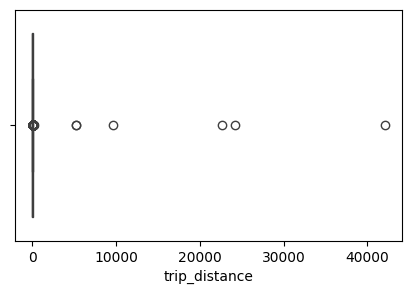

In [241]:
# Continue with outlier handling
plt.figure(figsize=(5,3))
sns.boxplot(x=df['trip_distance'])
plt.show()

<Axes: >

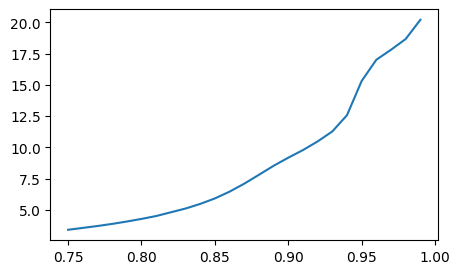

In [242]:
#checking the Percentile of data in trip_distance, if the distance is extramely high then obiously the charge will high
#check the distribution of for the outliners
plt.figure(figsize=(5,3))
quantitle=np.arange(0.75,1.0,0.01)
df['trip_distance'].quantile(quantitle).plot()

In [243]:
#We can see that we have a stable cure till 0.80 percentile and  post that we see a some deviations
df['trip_distance'].describe()

count    258526.000000
mean          3.875035
std         108.043685
min           0.000000
25%           1.050000
50%           1.800000
75%           3.400000
max       42079.000000
Name: trip_distance, dtype: float64

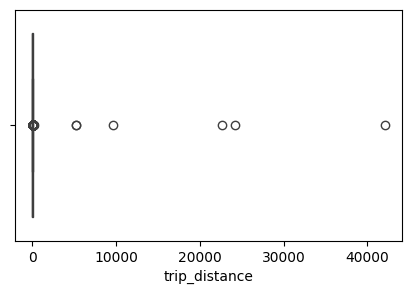

In [244]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['trip_distance'])
plt.show()

In [245]:
df['trip_distance'].quantile(0.95)

15.307500000000001

In [248]:
df=df[df['trip_distance']< df['trip_distance'].quantile(0.95)]

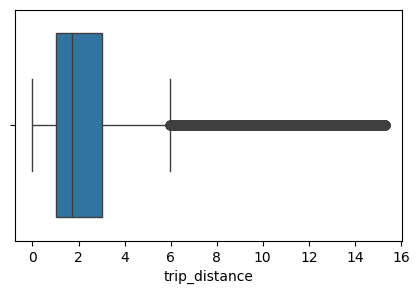

In [249]:
# We will take till 88 % first
#Displaying the box plot for trip_distance again
plt.figure(figsize=(5,3))
sns.boxplot(x=df['trip_distance'])
plt.show()

In [250]:
df['trip_distance'].describe()

count    245599.000000
mean          2.630827
std           2.685933
min           0.000000
25%           1.010000
50%           1.700000
75%           3.000000
max          15.300000
Name: trip_distance, dtype: float64

In [251]:
#calculating upper limit 
upper_limit=3.0+1.5 * (3.0-1.7)

In [252]:
df=df[df['trip_distance']<upper_limit ]

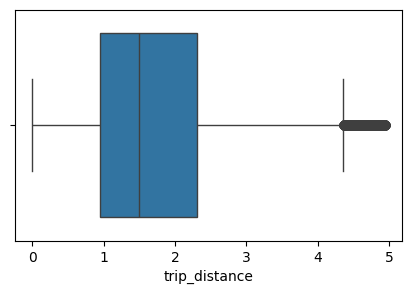

In [253]:
#Displaying the box plot for trip_distance again
plt.figure(figsize=(5,3))
sns.boxplot(x=df['trip_distance'])
plt.show()

##### Out liner for Payment_type

<Axes: ylabel='payment_type'>

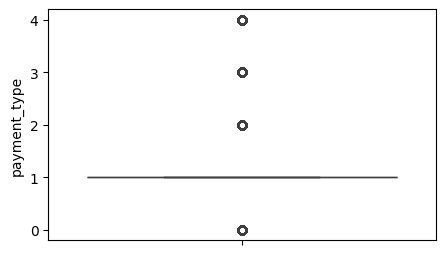

In [256]:
plt.figure(figsize=(5,3))
sns.boxplot(df['payment_type'])

In [260]:
# payment_type shows all different types of payment mode. Since payment_type 0 didn't exist in data dictionary so we will eliminate this
df=df[df['payment_type']!= 0]

In [261]:
# Do any columns need standardising?

# Looks like no column required standardrising

##### Outliners for Fare_amount

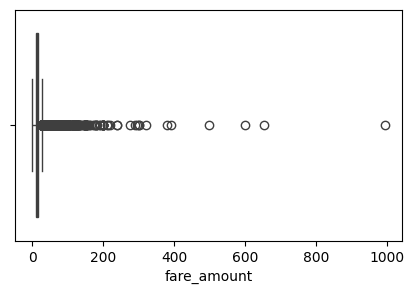

In [262]:
# Analyzing the outliners using boxplot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['fare_amount'])
plt.show()

In [263]:
# From the above graph we can see one outliner at 140K (too high  taxi fare) value and most of the data is concentrated over lover section of the graph,
# between 0 to 10K, still not clearly understandable.
df['fare_amount'].describe()

count    206536.000000
mean         13.448618
std           8.713886
min           0.000000
25%           8.600000
50%          12.100000
75%          16.300000
max         995.000000
Name: fare_amount, dtype: float64

In [264]:
# Remove One liner first
df=df[df['fare_amount']<10000]

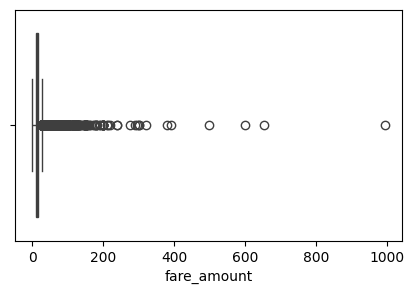

In [265]:
# Again check for outliners
plt.figure(figsize=(5,3))
sns.boxplot(x=df['fare_amount'])
plt.show()

<Axes: >

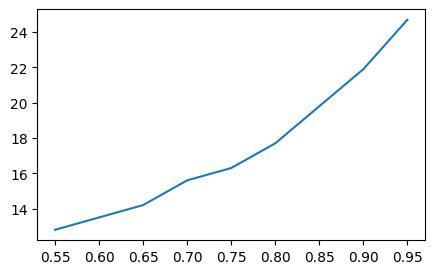

In [266]:
# Ploting the distribution function
plt.figure(figsize=(5,3))
quantitle=np.arange(0.55,1.0,0.05)
df['fare_amount'].quantile(quantitle).plot()

In [267]:
# we will keep till 95 percentile
df=df[df['fare_amount']<=df['fare_amount'].quantile(0.95)]

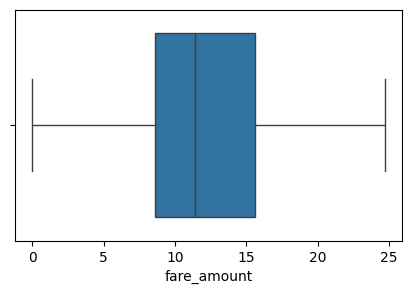

In [268]:
#plotting the box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['fare_amount'])
plt.show()

##### Outliners for Extra

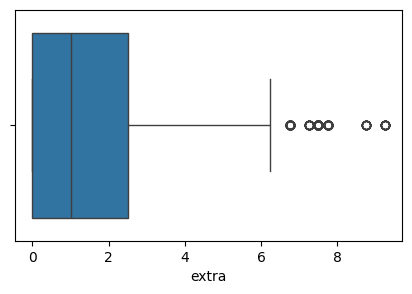

In [269]:
# Checking with the boxplot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['extra'])
plt.show()

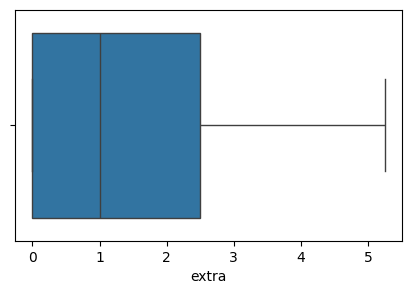

In [270]:
# We can see the vale for extra more than 6 are outlines, removing the outliners and recking useing box plot
df=df[df['extra']<6]
plt.figure(figsize=(5,3))
sns.boxplot(x=df['extra'])
plt.show()

##### Outliners for mta_tax

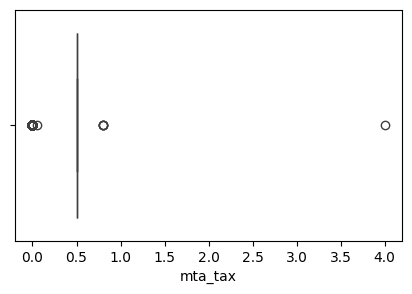

In [271]:
# Outliners using box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['mta_tax'])
plt.show()

In [272]:
(df['mta_tax'].value_counts()/len(df.index))*100

mta_tax
0.50    99.761965
0.00     0.234976
0.80     0.002039
4.00     0.000510
0.05     0.000510
Name: count, dtype: float64

In [273]:
# so 0.50 mta_tax consist of 99.79 percent and 0 mta tax is 0,20 percent and rest are ver minimal equivalent to 0.
# Removing this outliners
df=df[(df['mta_tax']==0.00) | (df['mta_tax']==0.50)]

In [274]:
(df['mta_tax'].value_counts()/len(df.index))*100

mta_tax
0.5    99.765017
0.0     0.234983
Name: count, dtype: float64

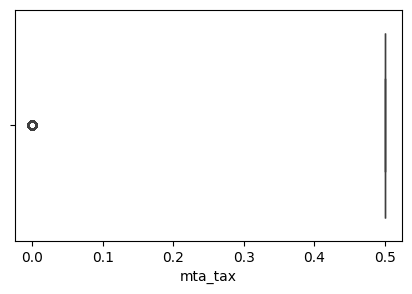

In [275]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['mta_tax'])
plt.show()

##### Outliner Improvement_surcharge

In [276]:
round(df['improvement_surcharge'].value_counts()/len(df.index),2)*100

improvement_surcharge
1.0    100.0
0.3      0.0
0.0      0.0
Name: count, dtype: float64

In [277]:
#We have improvement_surcharge=1 which is almost 100% , so keeping this column is of no use
df=df.drop(columns='improvement_surcharge',axis=1)

##### Outliners for tip_amount

In [278]:
round(df['tip_amount'].value_counts()/len(df.index),2)*100

tip_amount
0.00     22.0
2.00      6.0
1.00      5.0
3.00      3.0
2.80      2.0
         ... 
6.54      0.0
5.29      0.0
15.25     0.0
15.30     0.0
9.95      0.0
Name: count, Length: 821, dtype: float64

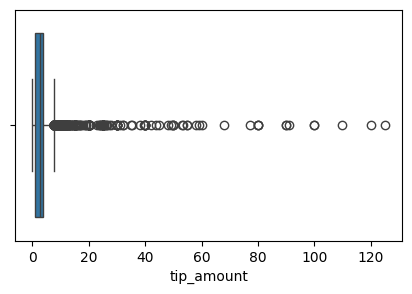

In [279]:
# Outliners using box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['tip_amount'])
plt.show()

In [280]:
# Most tippe amount falls under 0 to 100
df=df[df['tip_amount']<100]

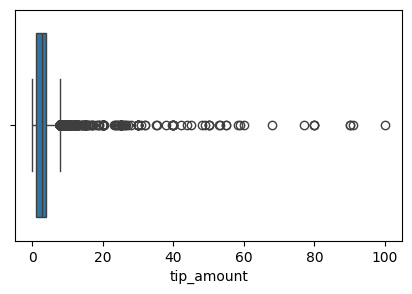

In [281]:
# Outliners using box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['tip_amount'])
plt.show()

In [282]:
#still out liner is present so the tip amount we will keep under 7
df=df[df['tip_amount']<7]

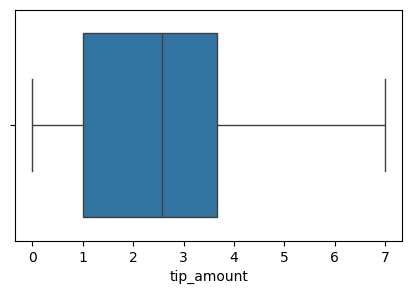

In [283]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['tip_amount'])
plt.show()

##### Outliners for Total_amount

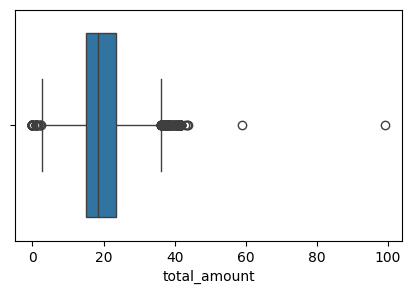

In [284]:
# Outliners using box plot
plt.figure(figsize=(5,3))
sns.boxplot(x=df['total_amount'])
plt.show()

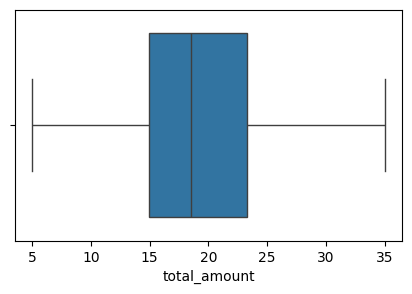

In [285]:
# Kpping the data between 5 and 35 to avoid outliners
df=df[(df['total_amount']>5) & (df['total_amount']<35)]
plt.figure(figsize=(5,3))
sns.boxplot(x=df['total_amount'])
plt.show()


##### Outliners for tolls_amount

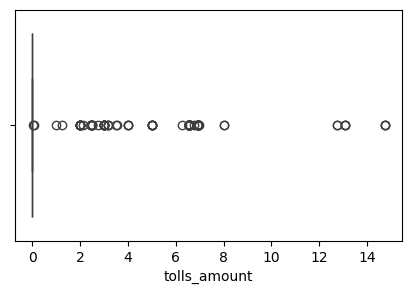

In [286]:
#checking for outliners
plt.figure(figsize=(5,3))
sns.boxplot(x=df['tolls_amount'])
plt.show()


In [287]:
df=df[df['tolls_amount']<10]

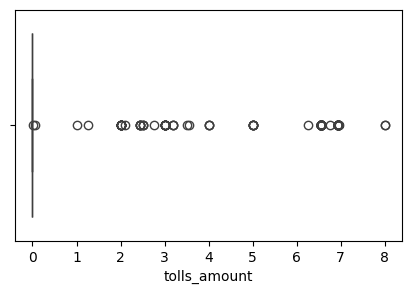

In [288]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['tolls_amount'])
plt.show()


##### Outliners for Conjestion_surcharge

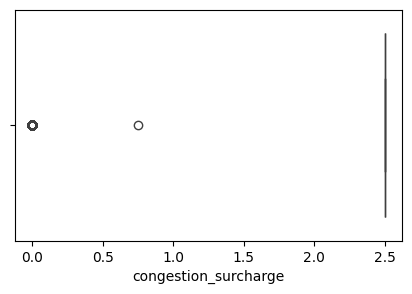

In [289]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['congestion_surcharge'])
plt.show()

In [290]:
(df['congestion_surcharge'].value_counts()/len(df.index))*100

congestion_surcharge
2.50    96.803655
0.00     3.195827
0.75     0.000517
Name: count, dtype: float64

In [291]:
# Removing congestion_surcharge 0.75 as it is extreamly low
df=df[df['congestion_surcharge']!=0.75]

##### Outliners for Airport_fee

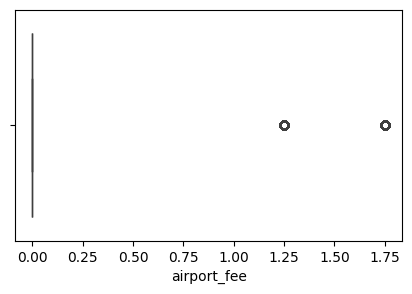

In [292]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['airport_fee'])
plt.show()

In [293]:
#so deleting the 1.75 airport fee as in the  data dictionary it is mentioned that 1.25 fare will be deducted 
#only at LaGuardia and John F. Kennedy Airports
df=df[df['airport_fee']!=1.75]

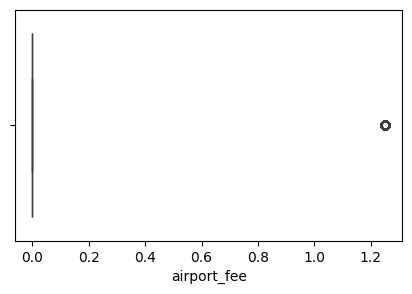

In [294]:
plt.figure(figsize=(5,3))
sns.boxplot(x=df['airport_fee'])
plt.show()

In [295]:
df=df.sort_index()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [296]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

In [297]:
numericals_cols=['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [299]:
numericals_cols

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

In [298]:
categorical_cols = ['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'RatecodeID',
 'PULocationID',
 'DOLocationID']

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

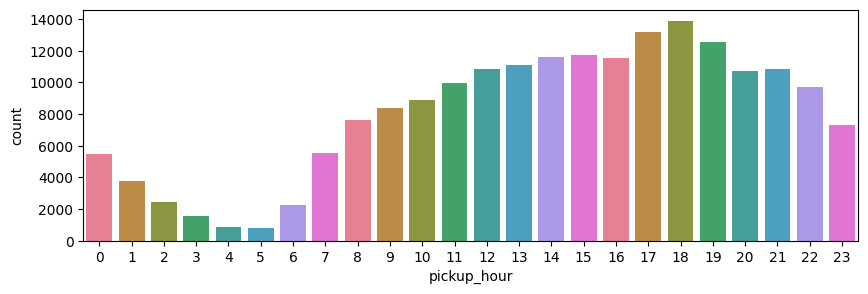

In [300]:
# Find and show the hourly trends in taxi pickups

#coverting to timestamp for easy fetching of hour
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
#creating new columns pickup_hour to identify the pattern
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

plt.figure(figsize=(10,3))
sns.countplot(x="pickup_hour", data=df,palette=sns.color_palette("husl", 8))
plt.show()

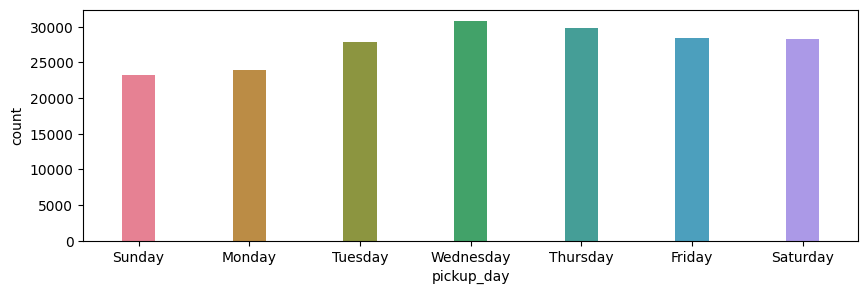

In [301]:
# Find and show the daily trends in taxi pickups (days of the week)

df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name()
plt.figure(figsize=(10,3))
sns.countplot(x="pickup_day", data=df,palette=sns.color_palette("husl", 8),width=0.3)
plt.show()


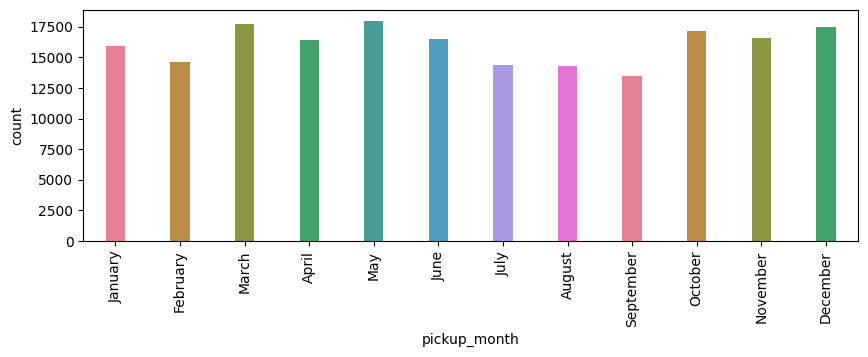

In [302]:
# Show the monthly trends in pickups

df['pickup_month']=df['tpep_pickup_datetime'].dt.month_name().sort_values()
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.countplot(x="pickup_month", data=df,palette=sns.color_palette("husl", 8),width=0.3
              ,order=['January','February', 'March', 'April',  'May','June', 'July','August', 'September','October', 'November', 'December', ])
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [303]:
# Analyse the above parameters
cols=['fare_amount', 'tip_amount', 'total_amount',  'trip_distance']
for col in cols:
    if col in df.columns:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            print(col)

In [304]:
for col in cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        if zero_count > 0:
            print(col)

tip_amount
trip_distance


In [305]:
#  tip_amount and trip_distance has zero values.

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

In [306]:
#it can simplify analysis by focusing on non-zero data, we need to  extract a meaningful insights. If no distance covered means taxi is not used.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [307]:
# Create a df with non zero entries for the selected parameters.
# 'tip_amount' can be zero for card payment
df_non_zero=df[(df['fare_amount']!=0.0)  & (df['trip_distance']!=0.0)]

In [308]:
for col in cols:
    if col in df_non_zero.columns:
        zero_count = (df_non_zero[col] == 0).sum()
        if zero_count > 0:
            print(col)

tip_amount


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [310]:
# Group data by month and analyse monthly revenue
df_revenue_per_month=pd.DataFrame(df_non_zero.groupby('pickup_month')['total_amount'].sum()).reset_index()


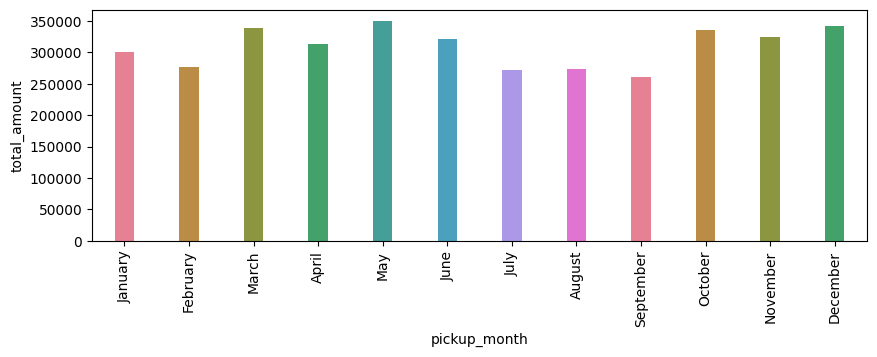

In [313]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sns.barplot(x="pickup_month", data=df_revenue_per_month,y='total_amount',palette=sns.color_palette("husl", 8),width=0.3
              ,order=['January','February', 'March', 'April',  'May','June', 'July','August', 'September','October', 'November', 'December', ])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [314]:
# Calculate proportion of each quarter

# Extract the quarter number (1, 2, 3, 4)
df_non_zero['pickup_quarter'] = df_non_zero['tpep_pickup_datetime'].dt.quarter

# Calculate total revenue for each quarter
quarterly_revenue = df_non_zero.groupby('pickup_quarter')['total_amount'].sum()

# Calculate total revenue for the entire period
total_annual_revenue = df_non_zero['total_amount'].sum()

# Calculate the proportion of each quarter's revenue
if total_annual_revenue > 0:
    quarterly_proportion = (quarterly_revenue / total_annual_revenue * 100).round(2)


In [321]:
pd.DataFrame(quarterly_revenue).reset_index()

pickup_quarter  total_amount
0               1     917125.49
1               2     984408.17
2               3     807577.50
3               4    1001298.78

In [317]:
# To add index as column in data frame used .reset_index()
pd.DataFrame(quarterly_proportion).reset_index()

pickup_quarter  total_amount
0               1         24.72
1               2         26.53
2               3         21.77
3               4         26.99

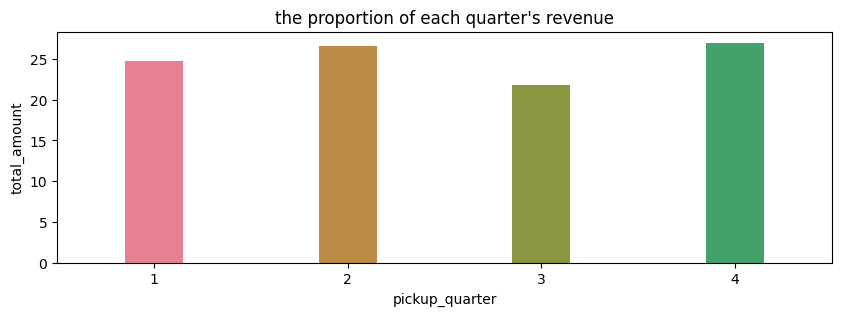

In [320]:
plt.figure(figsize=(10,3))
plt.title("the proportion of each quarter's revenue")
sns.barplot(x="pickup_quarter", data=pd.DataFrame(quarterly_proportion).reset_index(),y='total_amount',palette=sns.color_palette("husl", 8),width=0.3)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

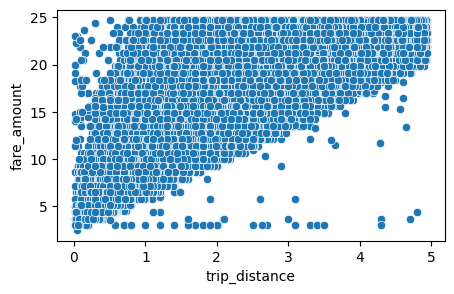

In [322]:
# Show how trip fare is affected by distance
plt.figure(figsize=(5,3))
sns.scatterplot(df_non_zero , x='trip_distance', y='fare_amount')
plt.show()

<Figure size 500x300 with 0 Axes>

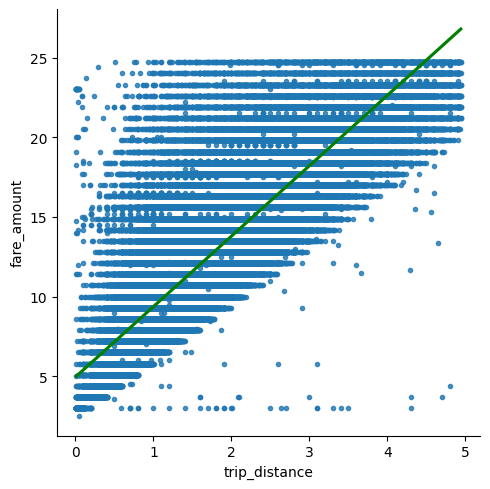

In [323]:
plt.figure(figsize=(5,3))
sns.lmplot(df_non_zero , x='trip_distance', y='fare_amount', markers= ['.'],line_kws={'color': 'Green'},palette=sns.color_palette("pastel"))
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

<Figure size 500x300 with 0 Axes>

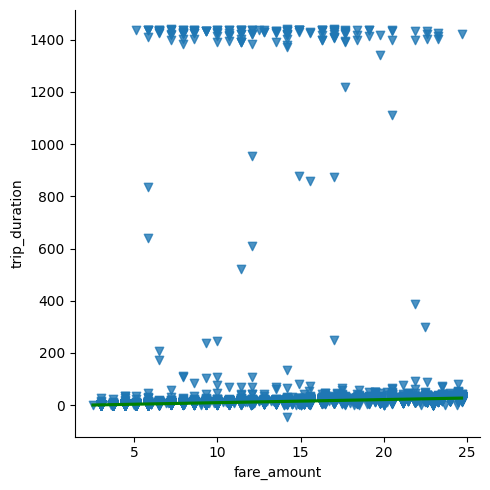

In [324]:
# Show relationship between fare and trip duration
df_non_zero['trip_duration'] = df_non_zero['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
#converting the trip_duration in minutes
df_non_zero['trip_duration'] = df_non_zero['trip_duration'].dt.total_seconds()/60 # In minutes

# Showing the relationship using different graph, regression  and heatmap
plt.figure(figsize=(5,3))
sns.lmplot(df_non_zero , y='trip_duration', x='fare_amount', markers= ['v'],line_kws={'color': 'Green'},palette=sns.color_palette("husl", 1))
plt.show()

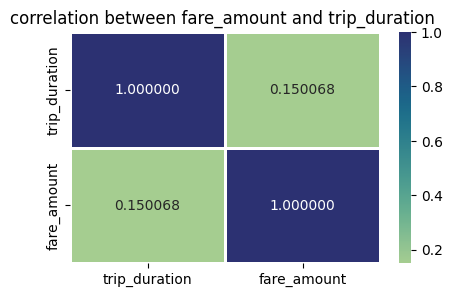

In [325]:
corr1=df_non_zero[['trip_duration', 'fare_amount']].corr()
plt.figure(figsize=[5,3])
plt.title('correlation between fare_amount and trip_duration ')
sns.heatmap(data=corr1,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

<Figure size 500x300 with 0 Axes>

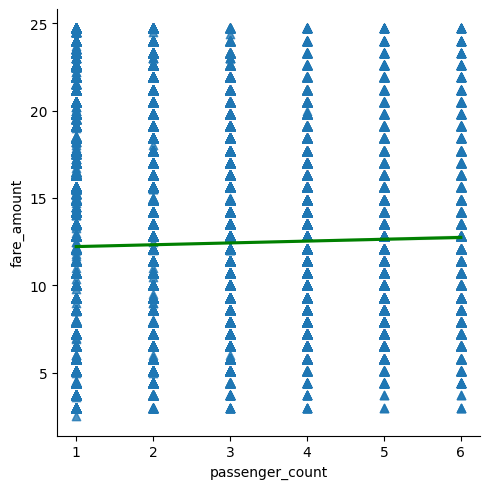

In [326]:
# Show relationship between fare and number of passengers

# Showing the relationship using different graph regression  and heatmap 
plt.figure(figsize=(5,3))
sns.lmplot(df_non_zero , x='passenger_count', y='fare_amount', markers= ['^'],line_kws={'color': 'Green'},palette='pastel')
plt.show()

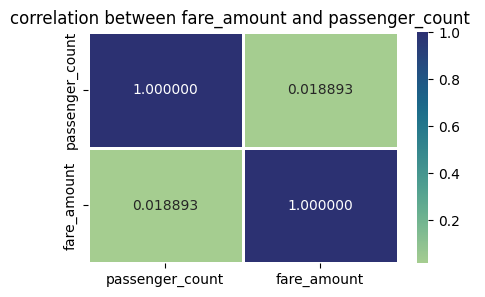

In [328]:
corr2=df_non_zero[['passenger_count', 'fare_amount']].corr()
plt.figure(figsize=[5,3])
plt.title('correlation between fare_amount and passenger_count ')
sns.heatmap(data=corr2,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

<Figure size 500x300 with 0 Axes>

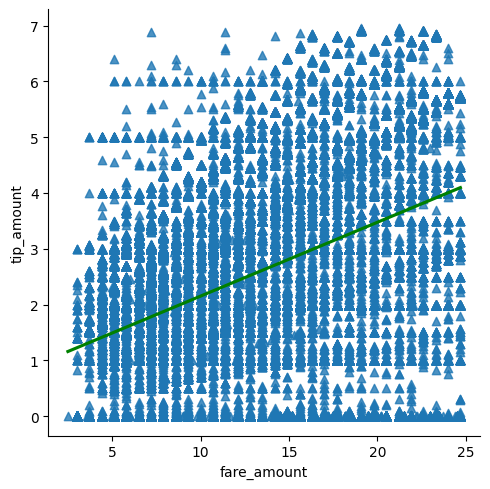

In [329]:
# Show relationship between tip and trip distance

plt.figure(figsize=(5,3))
sns.lmplot(df_non_zero , y='tip_amount', x='fare_amount', markers= ['^'],line_kws={'color': 'Green'},palette=sns.color_palette("husl", 1))
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

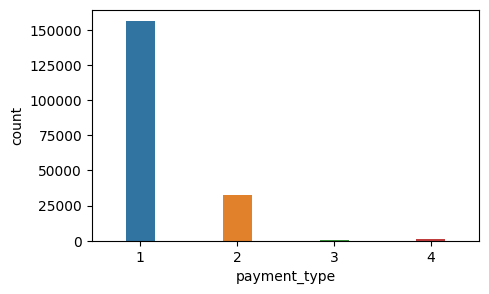

In [330]:
# Analyse the distribution of different payment types (payment_type).

plt.figure(figsize=(5,3))
sns.countplot(data=df_non_zero ,x='payment_type',width=0.3,palette=sns.color_palette())
plt.show()


In [331]:
# No payment type 0 mentioned in the data dictionary
df_non_zero=df_non_zero[df_non_zero['payment_type']!=0]

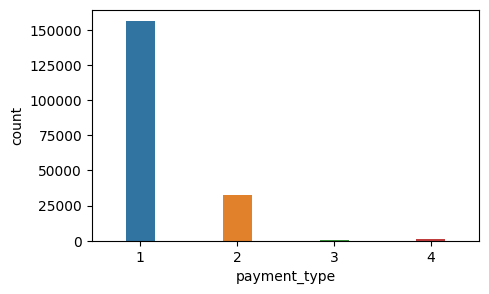

In [332]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_non_zero ,x='payment_type',width=0.3,palette=sns.color_palette())
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [333]:
# !pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [335]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file("G:\\ML UPGRAD\\ED Analysis\\Datasets and Dictionary\\taxi_zones\\taxi_zones.shp")
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...  
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....  
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...  
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...  
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [336]:
# print(zones.info())
print(zones.info())
# zones.plot()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

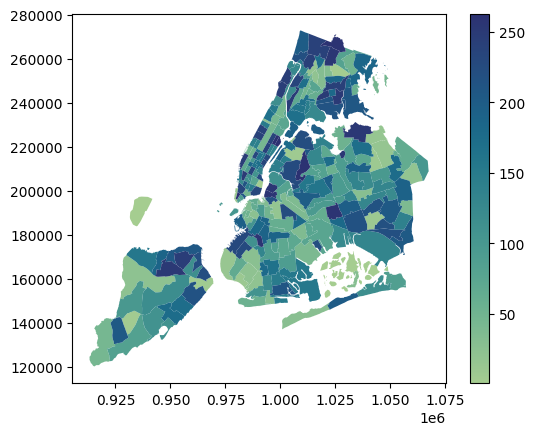

In [337]:
zones.plot(column=zones['LocationID'],legend=True, cmap="crest")

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [338]:
# Merge zones and trip records using locationID and PULocationID

df_merged=df_non_zero.copy()

# renaming the column name
df_merged=df_merged.rename(columns={'PULocationID': 'LocationID'})


In [339]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191208 entries, 0 to 262551
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               191208 non-null  int64         
 1   tpep_pickup_datetime   191208 non-null  datetime64[us]
 2   tpep_dropoff_datetime  191208 non-null  datetime64[us]
 3   passenger_count        191208 non-null  int64         
 4   trip_distance          191208 non-null  float64       
 5   RatecodeID             191208 non-null  float64       
 6   LocationID             191208 non-null  int64         
 7   DOLocationID           191208 non-null  int64         
 8   payment_type           191208 non-null  int64         
 9   fare_amount            191208 non-null  float64       
 10  extra                  191208 non-null  float64       
 11  mta_tax                191208 non-null  float64       
 12  tip_amount             191208 non-null  float64  

In [340]:
# The column through which we are merging should be same name and same datatype
df_merged['LocationID']=df_merged['LocationID'].astype("int32")

In [341]:
df_merged=df_merged.merge(zones,on='LocationID',how='left')

In [345]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191213 entries, 0 to 191212
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   index                  191213 non-null  int64         
 1   VendorID               191213 non-null  int64         
 2   tpep_pickup_datetime   191213 non-null  datetime64[us]
 3   tpep_dropoff_datetime  191213 non-null  datetime64[us]
 4   passenger_count        191213 non-null  int64         
 5   trip_distance          191213 non-null  float64       
 6   RatecodeID             191213 non-null  float64       
 7   LocationID             191213 non-null  int32         
 8   DOLocationID           191213 non-null  int64         
 9   payment_type           191213 non-null  int64         
 10  fare_amount            191213 non-null  float64       
 11  extra                  191213 non-null  float64       
 12  mta_tax                191213 non-null  floa

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [342]:
# Group data by location and calculate the number of trips
df_merged.reset_index(inplace=True)

location = 'LocationID'
if location in df_merged.columns:
    trips_by_location = df_merged[location].value_counts()



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [346]:
# Merge trip counts back to the zones GeoDataFrame

zones['trips_by_location']=trips_by_location

In [349]:
# the number of trips for each zone/location ID
pd.DataFrame(zones[['LocationID','trips_by_location']].groupby('LocationID').sum()).reset_index()

LocationID  trips_by_location
0             1                0.0
1             2                1.0
2             3                0.0
3             4                1.0
4             5              200.0
..          ...                ...
255         259                3.0
256         260                2.0
257         261               21.0
258         262              760.0
259         263             2783.0

[260 rows x 2 columns]

In [350]:
zones['trips_by_location']

0         NaN
1         1.0
2         NaN
3         1.0
4       200.0
        ...  
258       3.0
259       2.0
260      21.0
261     760.0
262    2783.0
Name: trips_by_location, Length: 263, dtype: float64

In [351]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((9.33e+05 1.93e+05, 9.33e+05 1.93e+05...   
1         Queens  MULTIPOLYGON (((1.03e+06 1.72e+05, 1.03e+06 1....   
2          Bronx  POLYGON ((1.03e+06 2.57e+05, 1.03e+06 2.57e+05...   
3      Manhattan  POLYGON ((9.92e+05 2.04e+05, 9.92e+05 2.04e+05...   
4  Staten Island  POLYGON ((9.36e+05 1.44e+05, 9.36e+05 1.44e+05...   

   trips_by_location  
0                NaN  
1                1.0  
2                NaN  
3                1.0  
4              200.0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

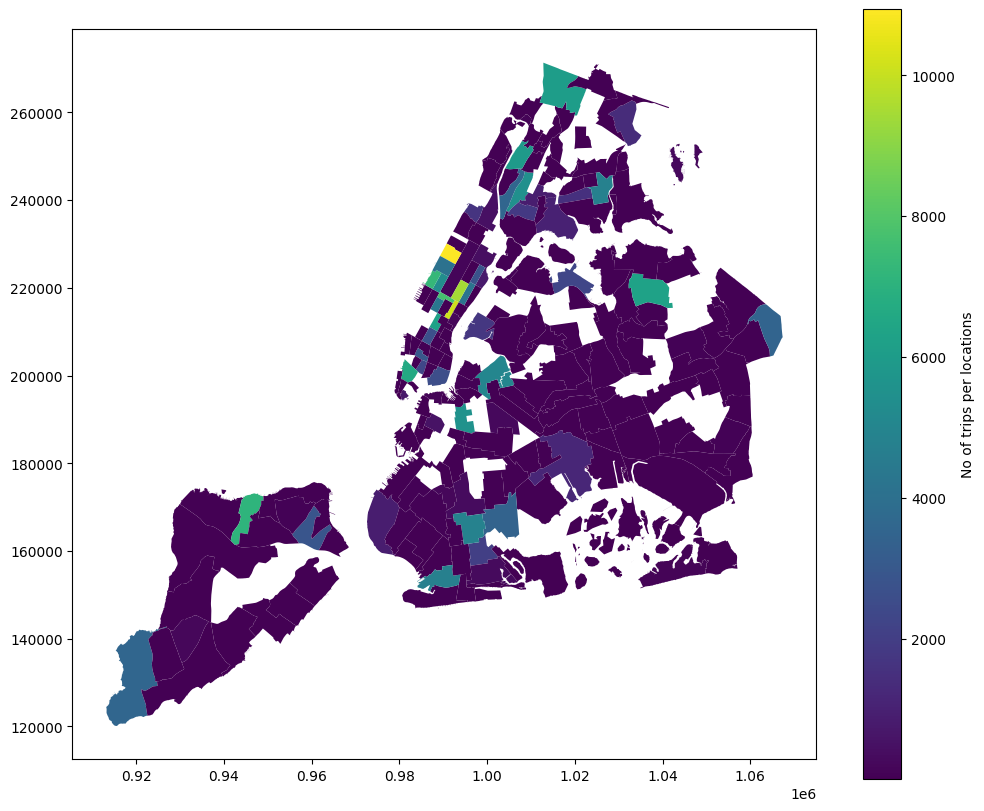

In [352]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column='trips_by_location',legend=True,ax=ax,legend_kwds = {'label': "No of trips per locations", 'orientation': "vertical"})
plt.show()


In [353]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted=zones.sort_values('trips_by_location')

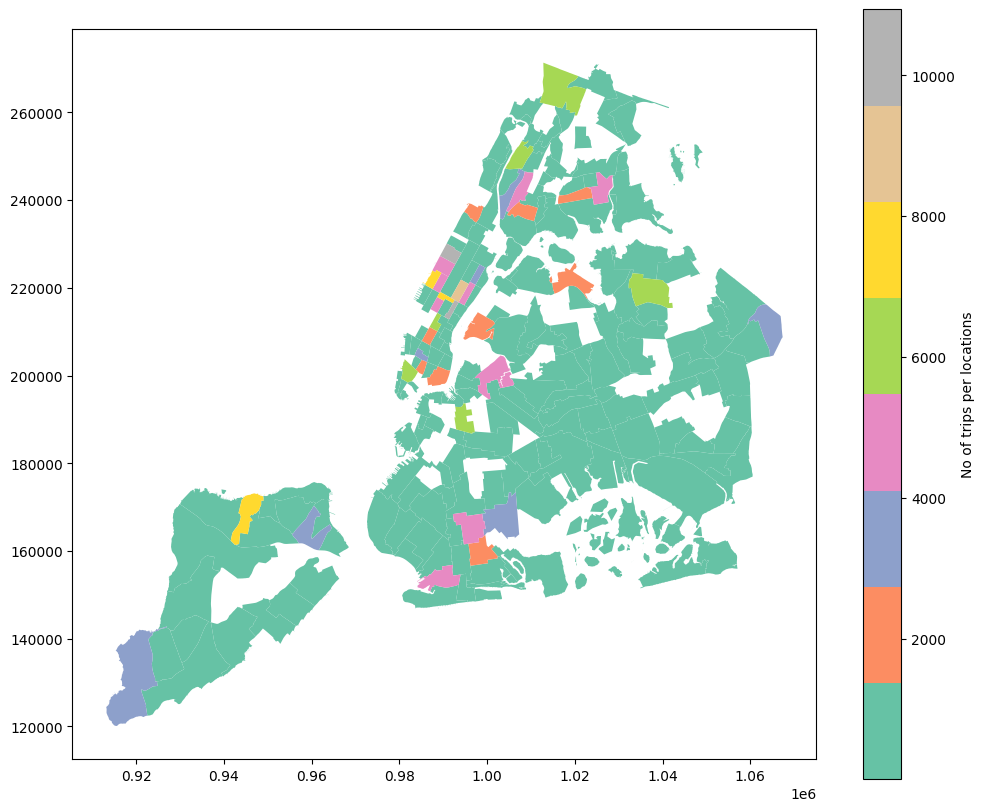

In [354]:
fig, ax = plt.subplots(1, 1, figsize = (12, 10))
zones_sorted.plot(column='trips_by_location',legend=True,ax=ax,legend_kwds = {'label': "No of trips per locations", 'orientation': "vertical"},cmap='Set2')
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### General EDA : Finding Patterns and Trends

Here are the compiled findings from the general analysis:

##### Busiest Hours, Days, and Months:

<h5>•	Hours: The busiest hours for taxi pickups are from 07:00 AM to 11:00 PM. There are also a few spikes around 00:00 AM, as some people go to offices for night shifts or are trying to get home. A sharp decline in pickups is observed from 01:00 AM till 05:00 AM. 

•	Days: People mostly travel on weekdays, with Wednesday and Thursday being the most popular days. Monday, Friday, and Saturday are in a close range of activity. Sunday sees fewer taxi boardings as people tend to stay in, though some do go out for family trips. Weekday trips are primarily for office visits. 

•	Months: March, May, and December are the months with the highest pickup counts, all exceeding 17,000, suggesting higher demand during these periods. October and April also show high activity, close to the peaks. February, July, August, and September generally have lower pickup counts compared to the peak months, with September being the lowest (just above 13,000). July and August also show a noticeable dip.

##### Trends in Revenue Collected:

<h5>•	The total revenue of a month is directly related to the number of passengers onboard taxis in that month; higher passenger counts lead to higher total revenue. 

•	The monthly revenue trend visually mirrors the monthly pickup counts, showing peaks around March, May, and December.

##### Trends in Quarterly Revenue:

<h5>•	The second (Q2) and fourth (Q4) quarters show the highest proportion of the yearly revenue. 

•	The third quarter (Q3) performed the lowest in terms of revenue. 

##### How Fare Depends on Trip Distance, Trip Duration, and Passenger Counts:
<h5>•	Trip Distance: For most data points, fare is directly proportional to trip distance, meaning as trip distance increases, fare also increases. 
People predominantly take taxis for short distances, as indicated by the dense population of data points in the upper part of the graph's diagonal.

•	Trip Duration: The relationship between trip duration and fare amount shows a slight positive inclination. Most people take taxis for shorter periods. Fewer people take taxis for durations between 200 minutes and 1200 minutes, with higher numbers observed above 1400 minutes. 

•	Passenger Counts: Mostly one person boards a taxi, and people are less inclined to take shared rides, irrespective of the fare amount. The correlation between fare amount and passenger count is very low. 

##### How Tip Amount Depends on Trip Distance:
<h5>•	The provided document states that "Higher the fare amount higher will be the tip collected". There is no direct statement in the provided text specifically on how tip amount depends on trip distance. However, given fare generally increases with distance, it can be inferred that longer trips (which have higher fares) would also lead to higher tips.

•	Outliers are present in the tip amount, and values under 7 are retained to manage these. 

•	Tip amount can be zero, especially for cash payments where no tip might be added. 

##### Busiest Zones:
<h5>•	The most intense taxi activity is heavily concentrated in Manhattan, where several areas show high trip counts exceeding 4,000, 6,000, 8,000, and even 10,000. 

•	Areas in Brooklyn and Queens generally show moderate activity (2,000-4,000 trips), with some specific neighborhoods showing slightly higher activity. 



#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [356]:
# Find routes which have the slowest speeds at different times of the day
df_merged.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'LocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'borough', 'geometry'],
      dtype='object')

In [357]:
# convert trip_duration to hours as trip duration calculated in seconds
df_merged['trip_duration_hours']=df_merged['trip_duration']/60

In [358]:
#calculating speed
df_merged['speed_mph']=df_merged['trip_distance']/df_merged['trip_duration_hours']

In [359]:
# speed can't be negative  and zero

cols=['speed_mph']
for col in cols:
    if col in df_merged.columns:
        count = (df_merged[col] <= 0).sum()
        if count > 0:
            print(col)

speed_mph


In [360]:
df_merged=df_merged[df_merged['speed_mph'] > 0]

In [361]:
# Group by Pickup Location, Dropoff Location, and Hour, then calculate the mean speed
slowest_routes_by_hour = df_merged.groupby(
        ['LocationID', 'DOLocationID', 'pickup_hour']
    )['speed_mph'].mean().reset_index()

In [362]:
slowest_routes_by_hour=slowest_routes_by_hour.sort_values(by='speed_mph', ascending=True)

In [363]:
slowest_routes_by_hour.head(10)

LocationID  DOLocationID  pickup_hour  speed_mph
4231           68            74            2   0.000939
7280           88            45           19   0.039048
9710          107           144            5   0.055547
18801         158           114           12   0.064692
25612         207           207           11   0.069364
11977         116           168           22   0.079323
12285         125           161           17   0.112707
33084         238           100           23   0.125336
9392          107            66            7   0.148361
2341           48            24           16   0.151979

How does identifying high-traffic, high-demand routes help us?

By knowing which routes and areas have the highest demand, the service can strategically position drivers and vehicles. This minimizes idle time for drivers and reduces waiting times for passengers, leading to increased efficiency and customer satisfaction. For instance, concentrating vehicles in Manhattan during peak hours, as suggested by the high trip counts, would be a direct application of this insight.




**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [367]:
# Visualise the number of trips per hour and find the busiest hour
pickup_hour = 'pickup_hour'
if pickup_hour in df_merged.columns:
    trips_by_pickup_hour = df_merged[pickup_hour].value_counts()


In [368]:
df_merged['trips_by_pickup_hour']=trips_by_pickup_hour

<Axes: xlabel='pickup_hour', ylabel='trips_by_pickup_hour'>

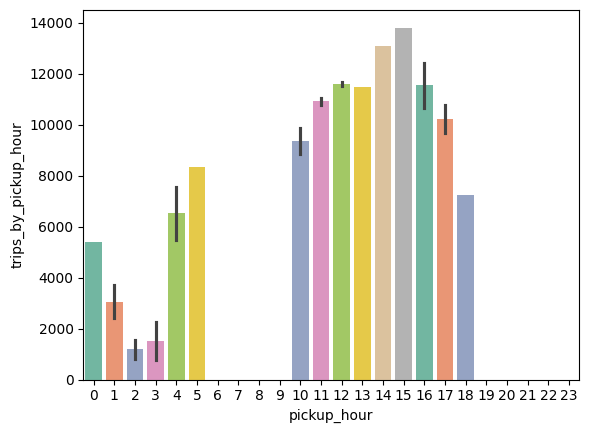

In [369]:
sns.barplot(data=df_merged,x='pickup_hour', y='trips_by_pickup_hour',palette='Set2')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [370]:
# Scale up the number of trips
scaling_factor = 1 / 0.025

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.025
df_merged['trips_by_pickup_hour_scalled'] = (df_merged['trips_by_pickup_hour'] * scaling_factor).round(0) 



<Axes: xlabel='pickup_hour', ylabel='trips_by_pickup_hour_scalled'>

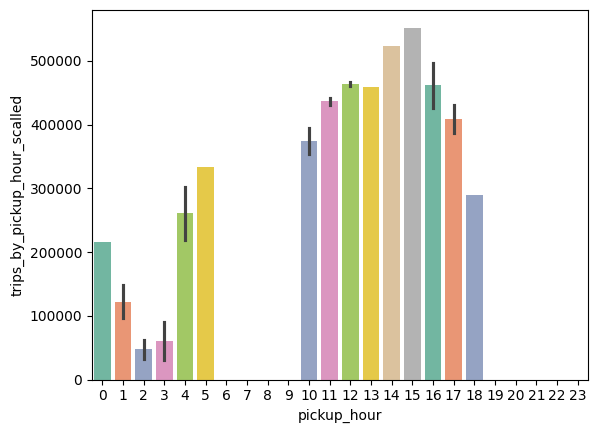

In [371]:
sns.barplot(data=df_merged,x='pickup_hour', y='trips_by_pickup_hour_scalled',palette='Set2')

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [372]:
# Compare traffic trends for the week days and weekends
df_merged['pickup_day_cat']=df_merged['pickup_day'].apply(lambda x: 'Weekend' if ((x== 'Sunday') | (x=='Sauarday')) else 'Weekdays')

<Axes: xlabel='pickup_hour', ylabel='count'>

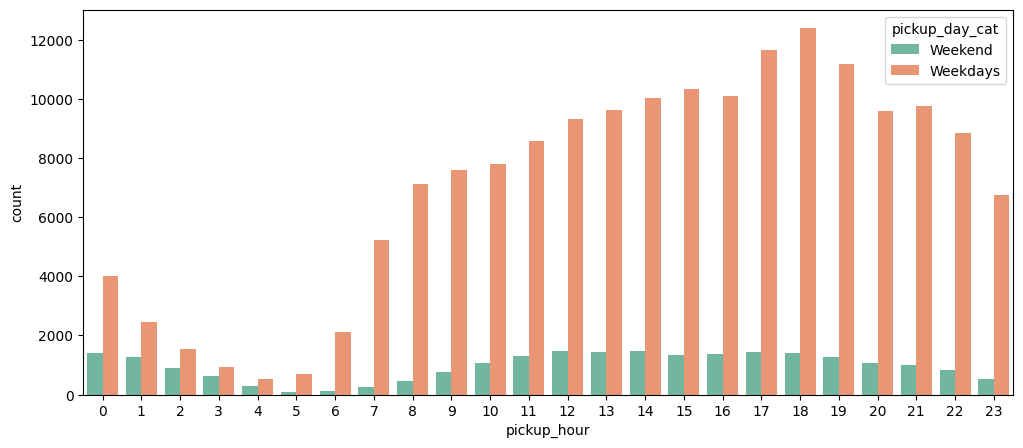

In [373]:
plt.figure(figsize=(12,5))
sns.countplot(data=df_merged,x='pickup_hour',hue='pickup_day_cat',palette='Set2')

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [374]:
# Find top 10 pickup and dropoff zones

# Top 10 pickup points using pickup location id
pd.DataFrame(df_merged[['LocationID','zone']].value_counts().sort_values(ascending=False)).head(10)

count
LocationID zone                               
237        Upper East Side South         10940
161        Midtown Center                10088
236        Upper East Side North          9480
162        Midtown East                   7734
142        Lincoln Square East            7273
186        Penn Station/Madison Sq West   7134
230        Times Sq/Theatre District      6583
163        Midtown North                  6298
170        Murray Hill                    6284
239        Upper West Side South          6046

In [375]:
# top 10 drop locations
pd.DataFrame(df_merged[['DOLocationID','zone']].value_counts().sort_values(ascending=False)).head(10)

count
DOLocationID zone                        
236          Upper East Side South   1738
237          Upper East Side North   1476
             Upper East Side South   1144
236          Upper East Side North   1114
237          Midtown Center           787
161          Upper East Side South    755
236          Midtown Center           686
239          Lincoln Square East      682
162          Upper East Side South    640
238          Upper West Side South    617

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [376]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_activity=pd.DataFrame(df_merged[['LocationID','zone']].value_counts())


In [377]:
pickup_activity=pickup_activity.reset_index().rename(columns={"index":'LocationID'})

In [378]:
drop_activity=pd.DataFrame(df_merged[['DOLocationID','zone']].value_counts())

In [379]:
drop_activity=drop_activity.reset_index().rename(columns={"index":'DOLocationID'})

In [380]:
drop_activity.rename(columns={'count': 'drop_count'},inplace=True)
pickup_activity.rename(columns={'count': 'pickup_count'},inplace=True)

In [381]:
pickup_activity.head()

LocationID                   zone  pickup_count
0         237  Upper East Side South         10940
1         161         Midtown Center         10088
2         236  Upper East Side North          9480
3         162           Midtown East          7734
4         142    Lincoln Square East          7273

In [382]:
pickup_drop_activities=pickup_activity.merge(drop_activity,on='zone',how='left')

In [383]:
pickup_drop_activities['pickup_drop_ratio']=pickup_drop_activities['pickup_count']/pickup_drop_activities['drop_count']

In [384]:
pd.DataFrame(pickup_drop_activities[['zone','LocationID','DOLocationID','pickup_drop_ratio']].sort_values(by='pickup_drop_ratio',ascending=False)).head(10)

zone  LocationID  DOLocationID  pickup_drop_ratio
63   Upper East Side South         237           247            10940.0
64   Upper East Side South         237            45            10940.0
65   Upper East Side South         237           168            10940.0
62   Upper East Side South         237           255            10940.0
133         Midtown Center         161           209            10088.0
125         Midtown Center         161           260            10088.0
126         Midtown Center         161           255            10088.0
127         Midtown Center         161            62            10088.0
128         Midtown Center         161            66            10088.0
129         Midtown Center         161            88            10088.0

In [385]:
pd.DataFrame(pickup_drop_activities[['zone','LocationID','DOLocationID','pickup_drop_ratio']].sort_values(by='pickup_drop_ratio')).head(10)

zone  LocationID  DOLocationID  \
4153                 Newark Airport           1             1   
4105                 Sheepshead Bay         210           210   
4122                  Fresh Meadows          98            98   
4123          Van Cortlandt Village         241            47   
4124                Cambria Heights          38            38   
4125  Westchester Village/Unionport         250           174   
4126                     Auburndale           9           191   
4127                      Gravesend         108           257   
4128    Heartland Village/Todt Hill         118             6   
4129                    Westerleigh         251           251   

      pickup_drop_ratio  
4153                1.0  
4105                1.0  
4122                1.0  
4123                1.0  
4124                1.0  
4125                1.0  
4126                1.0  
4127                1.0  
4128                1.0  
4129                1.0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [386]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

df_merged_night=df_merged[(df_merged['pickup_hour'] <=5) | (df_merged['pickup_hour']== 23)]

In [387]:
pd.DataFrame(df_merged_night[['LocationID','zone']].value_counts().sort_values(ascending=False)).head(10)

count
LocationID zone                               
79         East Village                   1832
249        West Village                   1453
48         Clinton East                   1136
148        Lower East Side                1063
114        Greenwich Village South        1041
230        Times Sq/Theatre District       907
186        Penn Station/Madison Sq West    762
164        Midtown South                   730
107        Gramercy                        683
234        Union Sq                        677

In [388]:
pd.DataFrame(df_merged_night[['DOLocationID','zone']].value_counts().sort_values(ascending=False)).head(10)

count
DOLocationID zone                            
79           West Village                 127
107          East Village                 111
79           East Village                 109
170          East Village                 108
79           Lower East Side              103
148          East Village                  94
137          East Village                  90
68           Clinton East                  85
79           Greenwich Village South       77
48           West Chelsea/Hudson Yards     76

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [389]:
# Filter for night hours (11 PM to 5 AM)
df_merged['pickup_hour'] = pd.to_numeric(df_merged['pickup_hour'])

In [390]:
if 'pickup_hour' in df_merged.columns:
    def categorize_hour(hour):
        if 23 <= hour or hour <= 5:
            return 'Night Hours' # 11 PM to 5 AM
        elif 6 <= hour <= 18:
            return 'Morning Hours' # 6 AM to 6 PM (18:00)
        else:
            return 'Evening Hours' # 7 PM (19:00) to 10 PM (22:00)

    df_merged['pickup_hour_category'] = df_merged['pickup_hour'].apply(categorize_hour)

In [393]:
df_revenue_per_hours=pd.DataFrame(df_merged[['pickup_hour_category','total_amount']].groupby('pickup_hour_category').sum()).reset_index()

<Axes: xlabel='pickup_hour_category', ylabel='total_amount'>

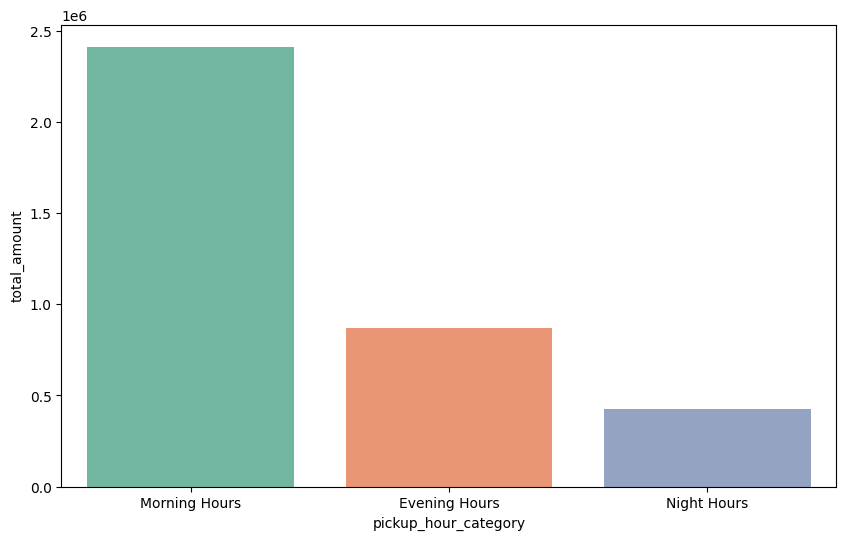

In [396]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_revenue_per_hours,y='total_amount',x='pickup_hour_category',palette='Set2',order=['Morning Hours','Evening Hours','Night Hours'])

In [398]:
df_revenue_per_hours_for_day=pd.DataFrame(df_merged[['pickup_hour_category','pickup_day','total_amount']].groupby(['pickup_hour_category','pickup_day']).sum()).reset_index()

<Axes: xlabel='pickup_hour_category', ylabel='total_amount'>

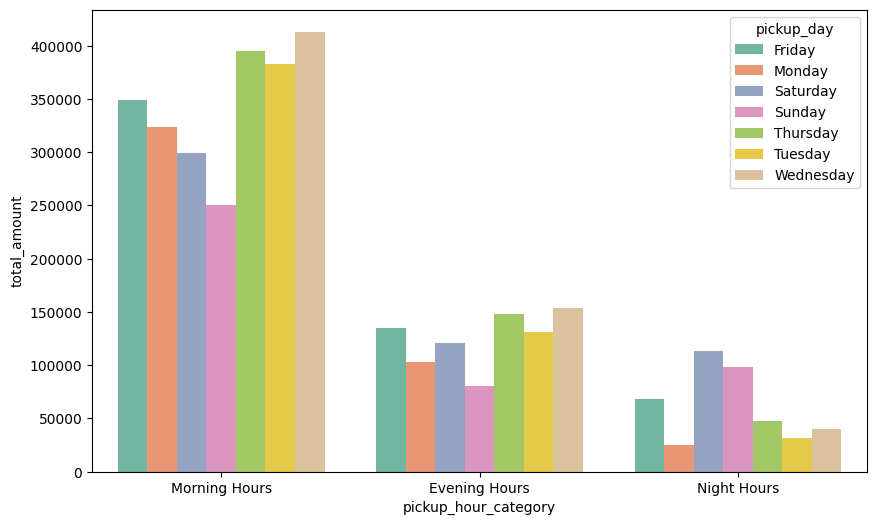

In [401]:
plt.figure(figsize=[10,6])
sns.barplot(data=df_revenue_per_hours_for_day,y='total_amount',x='pickup_hour_category',hue='pickup_day',palette='Set2',order=['Morning Hours','Evening Hours','Night Hours'])

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [402]:
# Analyse the fare per mile per passenger for different passenger counts


df_merged.columns

Index(['index', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'LocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'pickup_hour', 'pickup_day', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'borough', 'geometry', 'trip_duration_hours',
       'speed_mph', 'trips_by_pickup_hour', 'trips_by_pickup_hour_scalled',
       'pickup_day_cat', 'pickup_hour_category'],
      dtype='object')

In [403]:
#turning the passanger_count to the column  from index 
df_fare_per_mile=pd.DataFrame(df_merged[['trip_distance','fare_amount','passenger_count']].groupby('passenger_count').sum()).reset_index()

In [404]:
df_fare_per_mile


passenger_count  trip_distance  fare_amount
0                1      244076.30   1810355.65
1                2       46572.87    346036.98
2                3       11595.29     87168.10
3                4        6222.03     46780.20
4                5        4402.67     31768.00
5                6        2811.66     20858.00

In [405]:
loc=0
# Adding new column with valuw =0
df_fare_per_mile['fare_per_mile_cal']=0

for passenger_count in df_fare_per_mile['passenger_count']:
    print('calculating fare_per_mile_cal for passanger count =',{passenger_count})
    fare_per_mile_cal=df_fare_per_mile['fare_amount'][loc]/df_fare_per_mile['trip_distance'][loc]
    df_fare_per_mile['fare_per_mile_cal'][loc]=fare_per_mile_cal
    loc=loc+1
    

calculating fare_per_mile_cal for passanger count = {1}
calculating fare_per_mile_cal for passanger count = {2}
calculating fare_per_mile_cal for passanger count = {3}
calculating fare_per_mile_cal for passanger count = {4}
calculating fare_per_mile_cal for passanger count = {5}
calculating fare_per_mile_cal for passanger count = {6}


In [406]:
df_fare_per_mile

passenger_count  trip_distance  fare_amount  fare_per_mile_cal
0                1      244076.30   1810355.65           7.417171
1                2       46572.87    346036.98           7.430012
2                3       11595.29     87168.10           7.517544
3                4        6222.03     46780.20           7.518479
4                5        4402.67     31768.00           7.215621
5                6        2811.66     20858.00           7.418393

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [407]:
# Compare the average fare per mile for different days and for different times of the day

#turning the passanger_count to the column  from index 
df_fare_per_mile_for_hour_in_a_day=pd.DataFrame(df_merged[['trip_distance','fare_amount','pickup_hour','pickup_day']]
                                                .groupby(['pickup_day','pickup_hour']).sum()).reset_index()

In [408]:
df_fare_per_mile_for_hour_in_a_day.head()

pickup_day  pickup_hour  trip_distance  fare_amount
0     Friday            0        1734.07      10699.5
1     Friday            1         906.01       5275.2
2     Friday            2         515.97       3024.5
3     Friday            3         310.16       1735.6
4     Friday            4         175.50       1006.0

In [409]:
loc=0
# Adding new column with valuw =0
df_fare_per_mile_for_hour_in_a_day['fare_per_mile_for_hour_in_a_day_cal']=0


for  pickup_hour in  df_fare_per_mile_for_hour_in_a_day['pickup_hour']:
        
         fare_per_mile_for_hour_in_a_day_cal=round(df_fare_per_mile_for_hour_in_a_day['fare_amount'][loc]/df_fare_per_mile_for_hour_in_a_day['trip_distance'][loc],2)
         df_fare_per_mile_for_hour_in_a_day['fare_per_mile_for_hour_in_a_day_cal'][loc]=fare_per_mile_for_hour_in_a_day_cal
         loc=loc+1

In [410]:
df_fare_per_mile_for_hour_in_a_day.head()

pickup_day  pickup_hour  trip_distance  fare_amount  \
0     Friday            0        1734.07      10699.5   
1     Friday            1         906.01       5275.2   
2     Friday            2         515.97       3024.5   
3     Friday            3         310.16       1735.6   
4     Friday            4         175.50       1006.0   

   fare_per_mile_for_hour_in_a_day_cal  
0                                 6.17  
1                                 5.82  
2                                 5.86  
3                                 5.60  
4                                 5.73

In [411]:
pd.pivot_table(data=df_fare_per_mile_for_hour_in_a_day,index='pickup_hour',columns='pickup_day', values='fare_per_mile_for_hour_in_a_day_cal')

pickup_day   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
pickup_hour                                                                
0              6.17    5.80      6.54    6.59      5.92     5.92       6.03
1              5.82    5.78      6.33    6.22      5.77     5.69       5.75
2              5.86    5.68      5.99    6.04      5.79     5.63       6.11
3              5.60    5.76      5.90    5.95      5.90     6.01       5.73
4              5.73    5.65      5.72    5.76      5.68     5.80       5.72
5              5.90    6.33      5.79    5.93      5.90     5.93       6.24
6              6.18    6.04      6.07    5.53      6.20     6.20       6.18
7              6.69    6.76      5.97    5.91      6.82     6.90       6.85
8              7.34    7.48      6.31    5.95      7.67     7.75       7.64
9              7.67    7.83      6.53    6.19      8.15     8.21       8.13
10             7.90    7.74      6.89    6.59      8.43     8.29       8.39
11             8.31    8.06      7.24    6.93      8.75     8.77       8.85
12             8.23    7.90      7.41    7.13      8.88     8.77       8.97
13             8.06    7.87      7.76    7.33      8.82     8.54       8.91
14             8.17    7.89      7.63    7.55      8.75     8.45       8.67
15             8.35    7.95      7.62    7.49      8.76     8.51       8.76
16             8.10    7.87      7.80    7.37      8.57     8.37       8.44
17             7.89    7.58      7.87    7.35      8.44     8.23       8.38
18             7.65    7.32      7.72    7.33      8.04     7.94       8.08
19             7.59    6.89      7.92    6.99      7.53     7.21       7.47
20             7.34    6.62      7.46    6.71      7.04     6.65       6.77
21             7.17    6.35      7.21    6.46      6.75     6.52       6.55
22             7.03    6.25      7.10    6.22      6.56     6.41       6.40
23             6.84    6.03      6.94    6.01      6.37     6.06       6.26

In [412]:
df_fare_per_mile_for_hour_in_a_day_pivot = pd.pivot_table(data=df_fare_per_mile_for_hour_in_a_day,index='pickup_hour',columns='pickup_day', values='fare_per_mile_for_hour_in_a_day_cal')

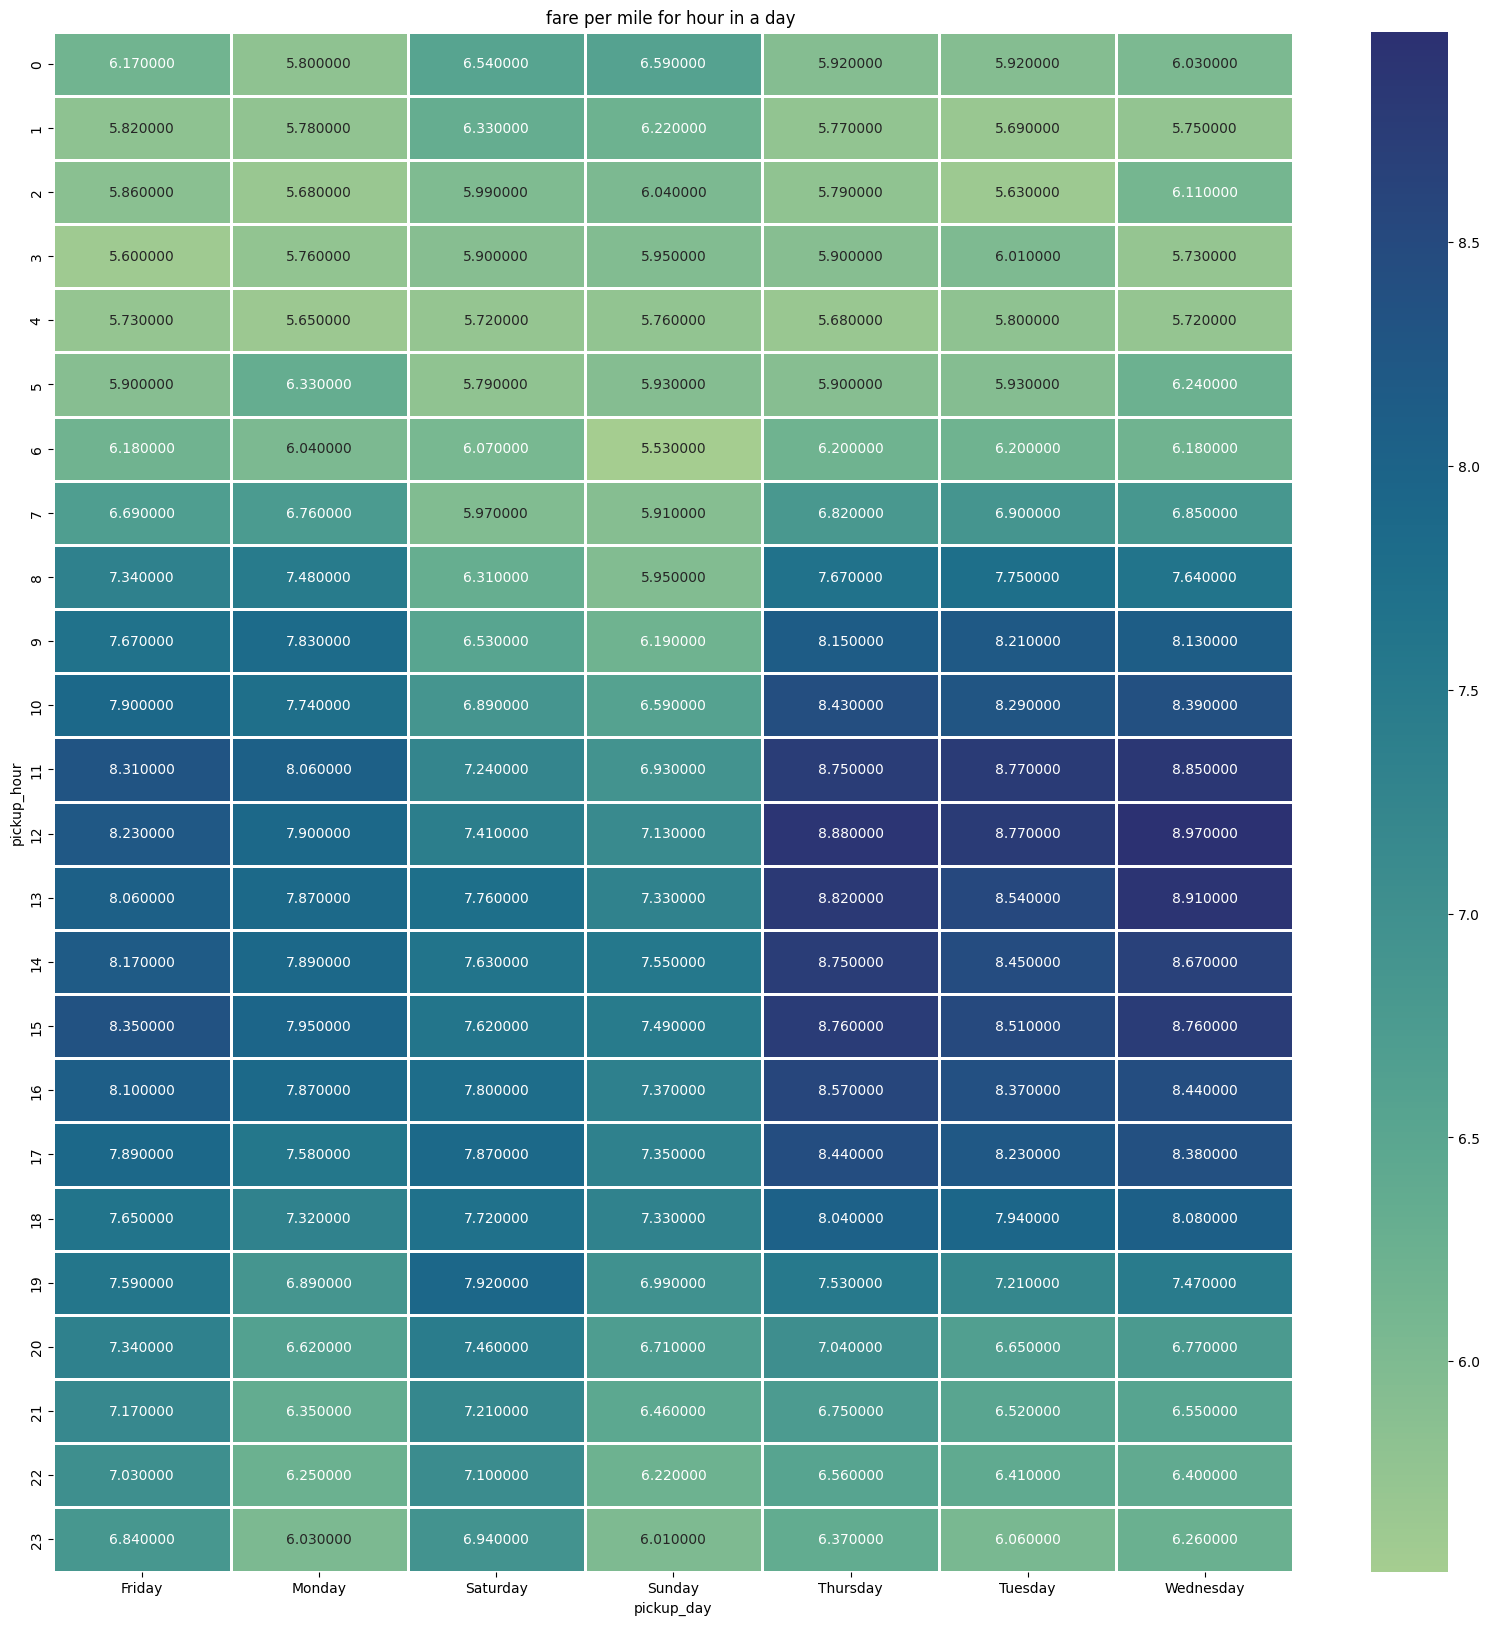

In [414]:
plt.figure(figsize=[20,20])
plt.title('fare per mile for hour in a day ')
sns.heatmap(data=df_fare_per_mile_for_hour_in_a_day_pivot,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='f')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [415]:
# Compare fare per mile for different vendors

#turning the passanger_count to the column  from index 
df_fare_per_mile_for_vendor=pd.DataFrame(df_merged[['trip_distance','fare_amount','VendorID']]
                                                .groupby('VendorID').sum()).reset_index()

In [416]:
df_fare_per_mile_for_vendor

VendorID  trip_distance  fare_amount
0         1       78855.40    581416.00
1         2      236825.42   1761550.93

In [417]:
loc=0

# defining new column for dataframe df_fare_per_mile_for_vendor
df_fare_per_mile_for_vendor['fare_per_mile_for_vendor'] =0

for vendor in df_fare_per_mile_for_vendor['VendorID']:
    df_fare_per_mile_for_vendor['fare_per_mile_for_vendor'][loc] = df_fare_per_mile_for_vendor['fare_amount'][loc]/df_fare_per_mile_for_vendor['trip_distance'][loc]
    loc=loc+1

In [418]:
df_fare_per_mile_for_vendor

VendorID  trip_distance  fare_amount  fare_per_mile_for_vendor
0         1       78855.40    581416.00                  7.373192
1         2      236825.42   1761550.93                  7.438183

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [419]:
# Defining distance tiers

df_merged['trip_distance_category']=pd.qcut(x=df_merged['trip_distance'],q=[0,0.33,0.66,1],labels = ['0-2 Miles', '2-5 Miles', '>5 Miles'])

In [426]:
df_trip_distance_category_fare_distance=pd.DataFrame(df_merged[['VendorID','trip_distance_category','trip_distance','fare_amount']].groupby(['trip_distance_category','VendorID']).sum()).reset_index()

In [427]:
df_trip_distance_category_fare_distance

trip_distance_category  VendorID  trip_distance  fare_amount
0              0-2 Miles         1       13765.10    142508.40
1              0-2 Miles         2       35737.90    371426.30
2              2-5 Miles         1       20797.10    164553.50
3              2-5 Miles         2       68909.07    555820.63
4               >5 Miles         1       44293.20    274354.10
5               >5 Miles         2      132178.45    834304.00

In [428]:
loc=0
#create an new column
df_trip_distance_category_fare_distance['trip_per_rate']=0
for i in range(0,len(df_trip_distance_category_fare_distance.index)):
    df_trip_distance_category_fare_distance['trip_per_rate'][loc]=df_trip_distance_category_fare_distance['fare_amount'][loc]/df_trip_distance_category_fare_distance['trip_distance'][loc]
    loc=loc+1


In [429]:
df_trip_distance_category_fare_distance

trip_distance_category  VendorID  trip_distance  fare_amount  trip_per_rate
0              0-2 Miles         1       13765.10    142508.40      10.352878
1              0-2 Miles         2       35737.90    371426.30      10.393065
2              2-5 Miles         1       20797.10    164553.50       7.912329
3              2-5 Miles         2       68909.07    555820.63       8.066001
4               >5 Miles         1       44293.20    274354.10       6.194046
5               >5 Miles         2      132178.45    834304.00       6.311952

<Axes: xlabel='trip_distance_category', ylabel='trip_per_rate'>

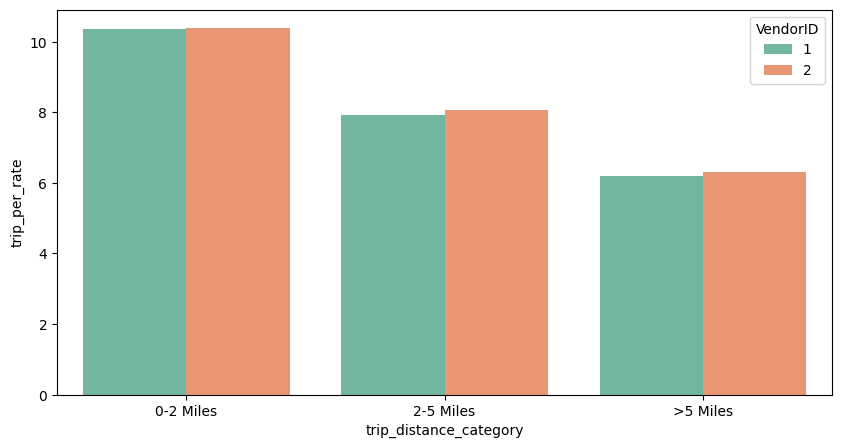

In [431]:
plt.figure(figsize=(10,5))
sns.barplot(data=df_trip_distance_category_fare_distance,y='trip_per_rate',x='trip_distance_category',hue='VendorID',palette='Set2')

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [432]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip_percentages=pd.DataFrame(df_merged[['trip_distance','passenger_count','pickup_hour','total_amount','tip_amount']].groupby(['trip_distance','passenger_count','pickup_hour','total_amount']).sum()).reset_index()

In [433]:
df_tip_percentages.head()

trip_distance  passenger_count  pickup_hour  total_amount  tip_amount
0           0.01                1            0           8.0         0.0
1           0.01                1            0          25.1         1.0
2           0.01                1            1           8.0         0.0
3           0.01                1            2          10.8         0.0
4           0.01                1            3           8.0         0.0

In [434]:
df_tip_percentages['tip_percentages']=0
for loc in range(0,len(df_tip_percentages.index)):
    tip_percentages=df_tip_percentages['tip_amount'][loc]/df_tip_percentages['total_amount'][loc]
    df_tip_percentages['tip_percentages'][loc]=tip_percentages

In [435]:
df_tip_percentages.head()

trip_distance  passenger_count  pickup_hour  total_amount  tip_amount  \
0           0.01                1            0           8.0         0.0   
1           0.01                1            0          25.1         1.0   
2           0.01                1            1           8.0         0.0   
3           0.01                1            2          10.8         0.0   
4           0.01                1            3           8.0         0.0   

   tip_percentages  
0         0.000000  
1         0.039841  
2         0.000000  
3         0.000000  
4         0.000000

<Figure size 500x300 with 0 Axes>

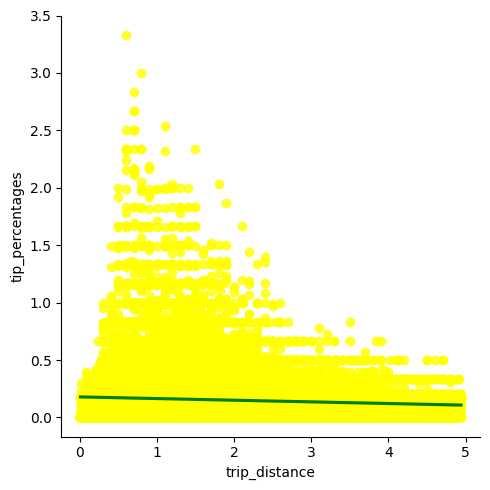

In [437]:
plt.figure(figsize=(5,3))
sns.lmplot(data=df_tip_percentages,y='tip_percentages',x='trip_distance',line_kws={'color': 'Green'},scatter_kws={'color': 'yellow'})

##### factors lead to low tip percentages
The tip is higher in cases when people took taxi for less trip distance so automatically the tip deducted were higher 
comparing to the customer for long distance as the fare will generate higher comparison to the low trip  distance customer.

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [439]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

df_trips_with_tip_percentage=pd.DataFrame(
df_tip_percentages[['trip_distance','tip_percentages','passenger_count']][(df_tip_percentages['tip_percentages']<10) |
    ((df_tip_percentages['tip_percentages']>25))].value_counts()).reset_index()

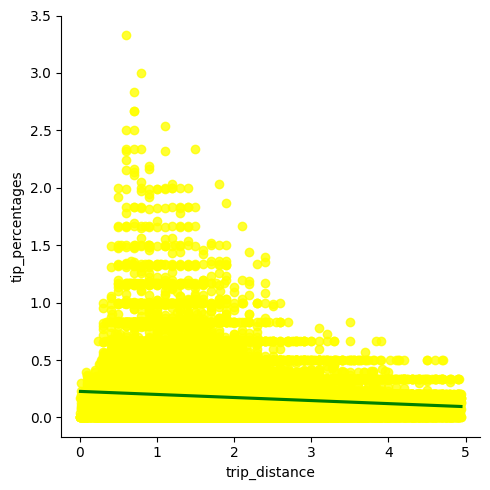

In [440]:
sns.lmplot(data=df_trips_with_tip_percentage,y='tip_percentages',x='trip_distance',line_kws={'color': 'Green'},scatter_kws={'color': 'yellow'})
           



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [442]:
# See how passenger count varies across hours and days
df_passenger_for_hour_in_a_day_pivot = pd.pivot_table(data=df_merged,index='pickup_hour',columns='pickup_day', values='passenger_count',aggfunc='count',sort=True)

<Axes: xlabel='pickup_day', ylabel='pickup_hour'>

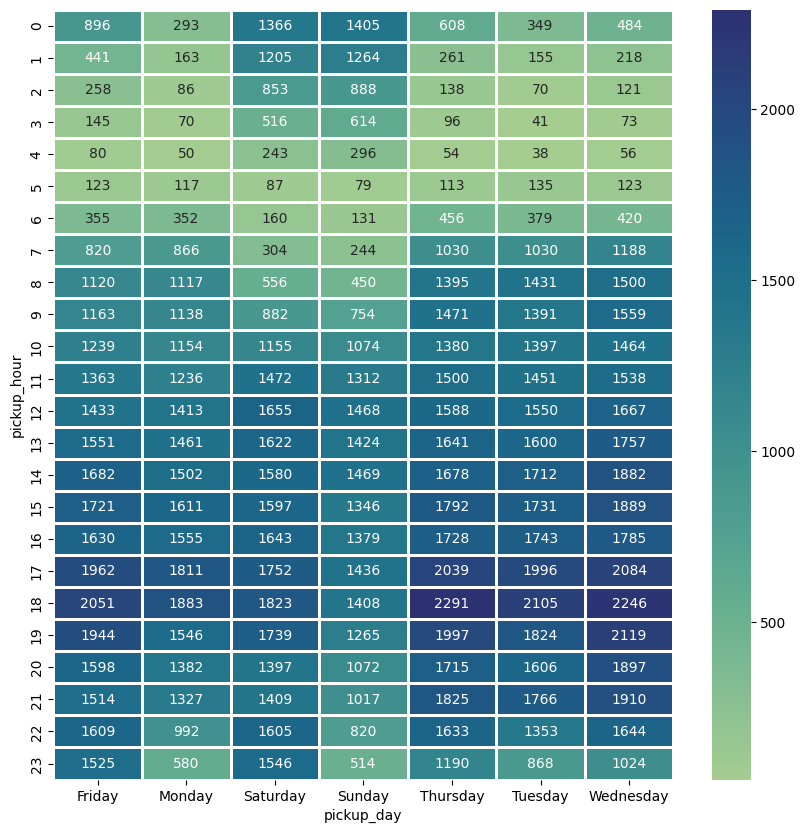

In [443]:
plt.figure(figsize=(10,10))
sns.heatmap(df_passenger_for_hour_in_a_day_pivot,cmap="crest",linecolor='white',linewidths=1,annot=True,fmt='d')

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [444]:
# How does passenger count vary across zones
df_passenger_per_zone=pd.DataFrame(df_merged[['zone','passenger_count']].groupby('zone').sum()).reset_index()

<Axes: xlabel='passenger_count', ylabel='zone'>

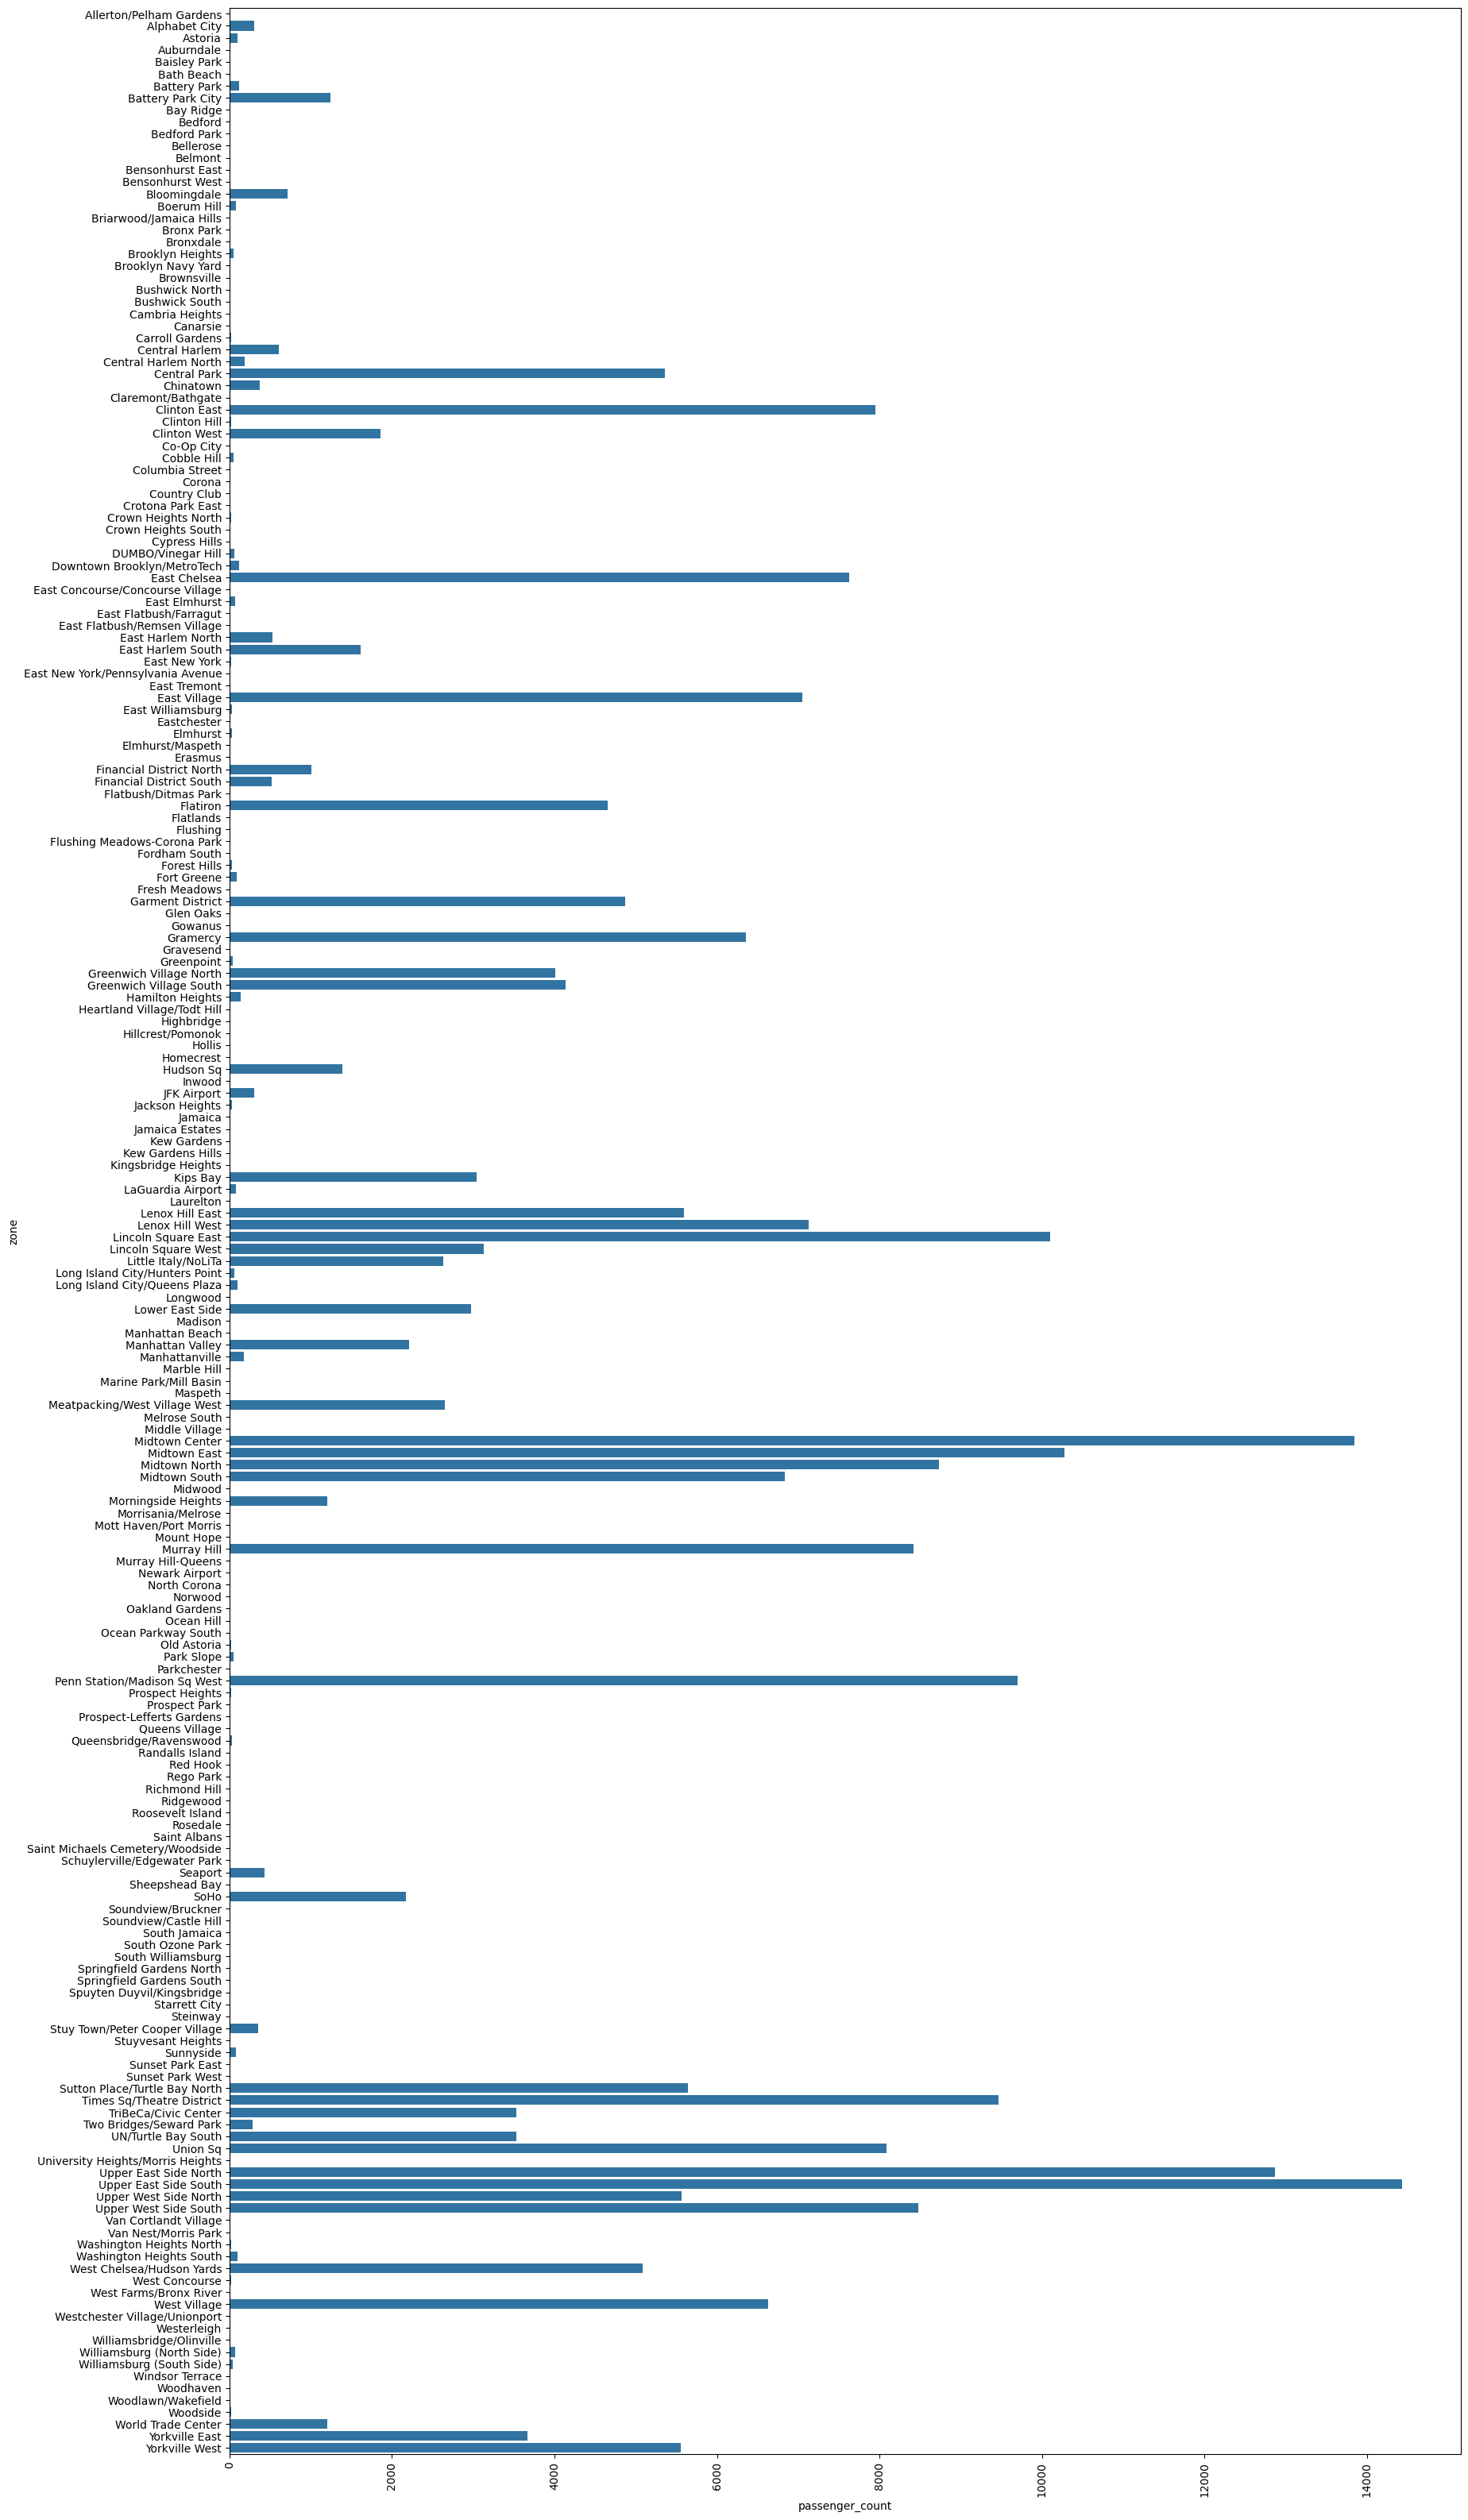

In [449]:
plt.figure(figsize=(20,40))
plt.xticks(rotation=90)
sns.barplot(y='zone', x='passenger_count', data=df_passenger_per_zone)


In [450]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

zones_with_trips_pivot=pd.pivot_table(data=df_merged,index='zone',columns='trip_distance_category',values='passenger_count',aggfunc='count')

<Axes: xlabel='trip_distance_category', ylabel='zone'>

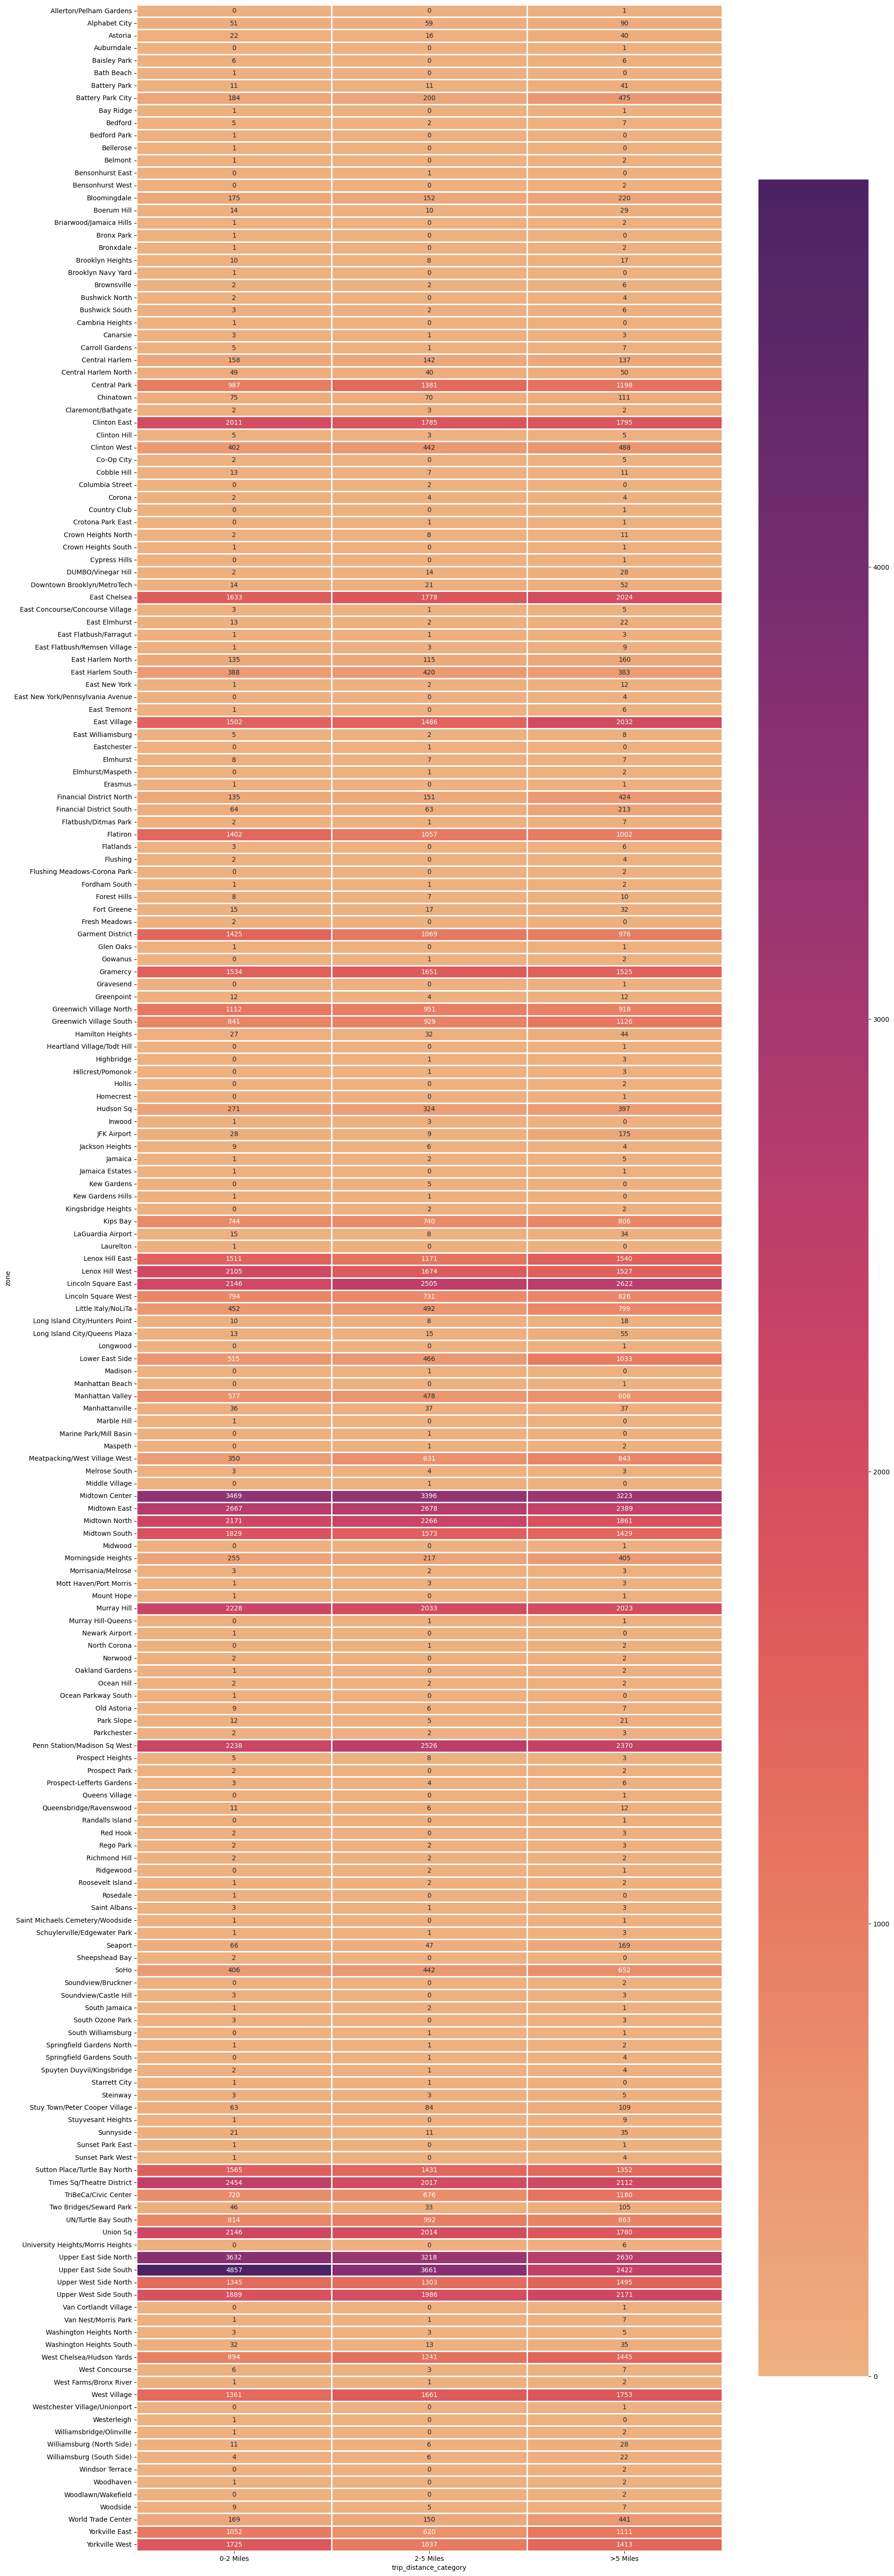

In [452]:
plt.figure(figsize=(20,70))
sns.heatmap(zones_with_trips_pivot,cmap="flare",linecolor='white',linewidths=1,annot=True,fmt='d')

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [471]:
# How often is each surcharge applied?
df_sucharged_pivot=pd.pivot_table(data=df_merged,aggfunc='count',columns='pickup_hour_category',index='zone',values='extra')


<Axes: xlabel='pickup_hour_category', ylabel='zone'>

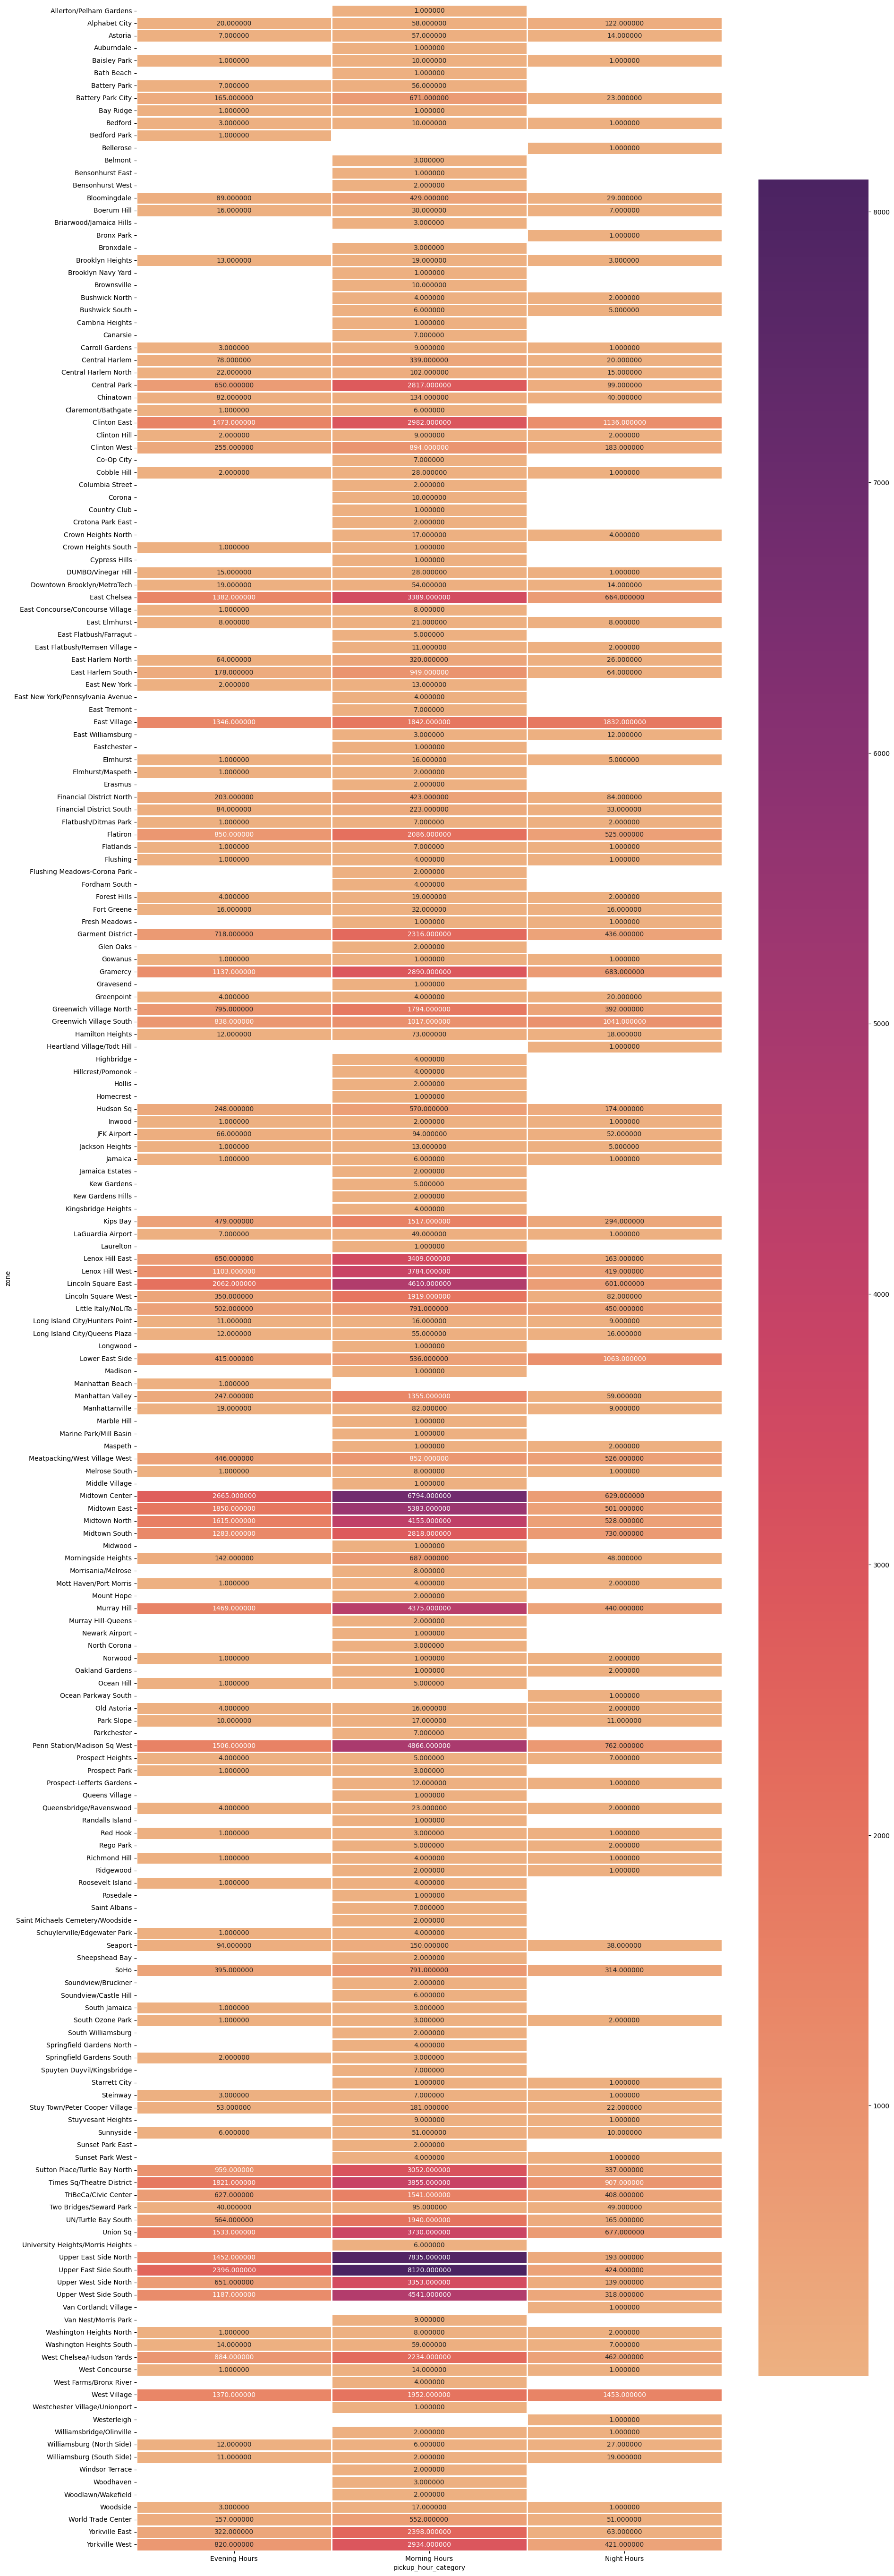

In [474]:
plt.figure(figsize=(20,70))
sns.heatmap(data=df_sucharged_pivot,cmap='flare',annot=True,linewidths=1,linecolor='white',fmt='f')

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

#####
•	Demand varies significantly by hour (peak vs. night), day (weekday vs. weekend), and month (seasonal peaks in March, May, Dec; dips in July-Sept).
    
•	Dynamically position drivers in high-demand zones (e.g., Manhattan) during peak hours and days. 

•	Implement granular, time-based surge pricing to balance supply and demand throughout the day and week. 

•	Offer targeted incentives for drivers working during off-peak hours or in less popular zones. 

•	Pre-position cabs for anticipated demand spikes from major events or holidays.

•	Employ smart re-routing after drop-offs to minimize deadheading and direct drivers to the next likely high-demand area. 


•	Consider specialized dispatching or incentives for long-distance trips to manage their impact on overall fleet availability. 

•	Prioritize single-passenger trip optimization in dispatching given their high prevalence.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.


•	Demand varies significantly by hour (peak vs. night), day (weekday vs. weekend), and month (seasonal peaks in March, May, Dec; dips in July-Sept).

•	Dynamically position drivers in high-demand zones (e.g., Manhattan) during peak hours and days. 

•	Implement granular, time-based surge pricing to balance supply and demand throughout the day and week. 

•	Offer targeted incentives for drivers working during off-peak hours or in less popular zones. 
    
•	Pre-position cabs for anticipated demand spikes from major events or holidays.

•	Employ smart re-routing after drop-offs to minimize deadheading and direct drivers to the next likely high-demand area. 
    
•	Consider specialized dispatching or incentives for long-distance trips to manage their impact on overall fleet availability. 
    
•	Prioritize single-passenger trip optimization in dispatching given their high prevalence.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

•	Implement surge pricing (multipliers up to 3x) during peak hours (7 AM-11 PM) and high-demand days (Wed-Thu) in Manhattan.

•	Apply moderate surge pricing (1.2x-1.5x) during monthly peaks (March, May, Dec) across all active zones to capitalize on seasonal demand. 

•	Offer competitive flat-rate options for common long-distance trips (e.g., airport routes) to provide predictability and capture high-value revenue.
Introduce loyalty discounts or off-peak incentives (e.g., 10-15% off) for rides during low-demand hours (1 AM-5 AM) to attract price-sensitive users.

•	Adjust per-mile rates for trips exceeding the typical distance (outliers) to ensure adequate compensation for drivers and reflect actual operational costs. 

•	Adjust surge multipliers at a granular, zonal level every 5-10 minutes. Conduct A/B testing on different surge communication strategies to maximize acceptance rates during high-demand periods. 

•	Analyze competitor pricing on key routes and adjust base fares or surge caps to remain competitive while optimizing for net revenue. 

•	Develop tiered pricing for specific vehicle types (e.g., premium, standard) that aligns with demand patterns and customer willingness to pay. Implement a dynamic idle time charge for extended wait times (e.g., >2 minutes) before pickup to compensate drivers for time delays.

•	Offer promotional codes for off-peak hours or less busy zones (e.g., Brooklyn outskirts) to stimulate demand and balance supply
